# Uczenie maszynowe

## Lista 4: Algorytmy grupowania danych

**Autor:** Patryk Rygiel (250080)  
**GitHub:** https://github.com/PatRyg99/ML-PWR-2022

In [1]:
library(ggplot2)
library(grid)
library(gridExtra)
library(ggpubr)
library(ggfortify)
library(cluster)
library(clusterCrit)
library(funtimes)

In [2]:
source("utils/general.R")
source("utils/kmeans.R")
source("utils/pam.R")

# IRIS

In [3]:
irisData <- read.csv("zbiory/iris.data", header=FALSE)
colnames(irisData) <- c("sepal.length", "sepal.width", "petal.length", "petal.width", "class")

head(irisData)

sepal.length sepal.width petal.length petal.width class      
1 5.1          3.5         1.4          0.2         Iris-setosa
2 4.9          3.0         1.4          0.2         Iris-setosa
3 4.7          3.2         1.3          0.2         Iris-setosa
4 4.6          3.1         1.5          0.2         Iris-setosa
5 5.0          3.6         1.4          0.2         Iris-setosa
6 5.4          3.9         1.7          0.4         Iris-setosa

## 1. K-means vs PAM (domyślne parametry)

Dla każdej z metod klasteryzacji wykonane zostało 5 prób - w każdej początkowe centroidy są wybierane losowo.

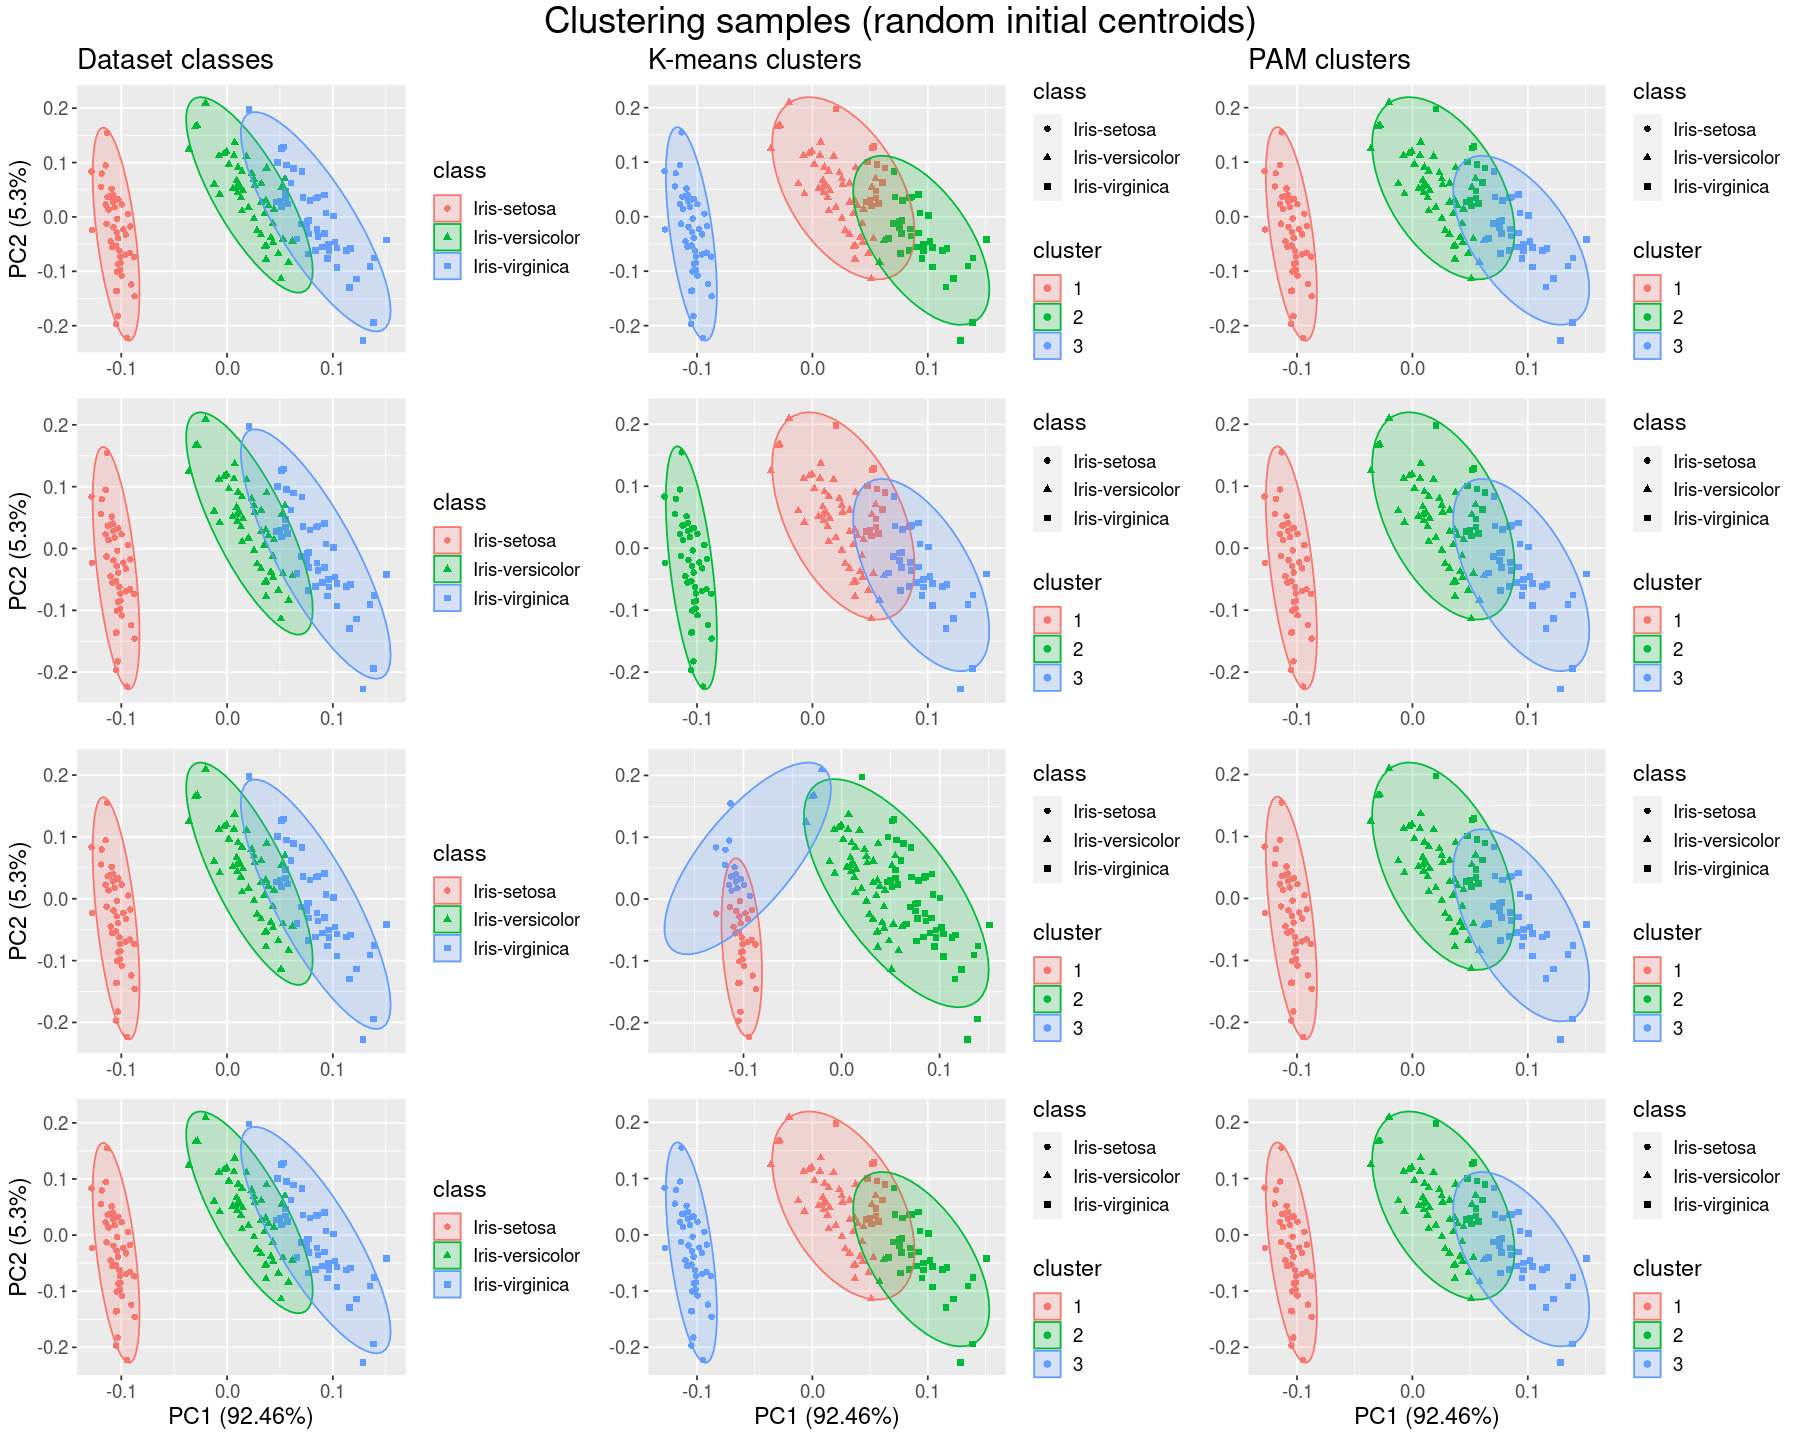

In [4]:
options(repr.plot.width=15, repr.plot.height=12)
G <- clustering.vis.samples(irisData, 4)

## 2. Badanie klasteryzacji dla różnych ustawień parametrów początkowych

### 2.1 K-means

#### 2.1.1 Badanie maksymalnej ilości iteracji

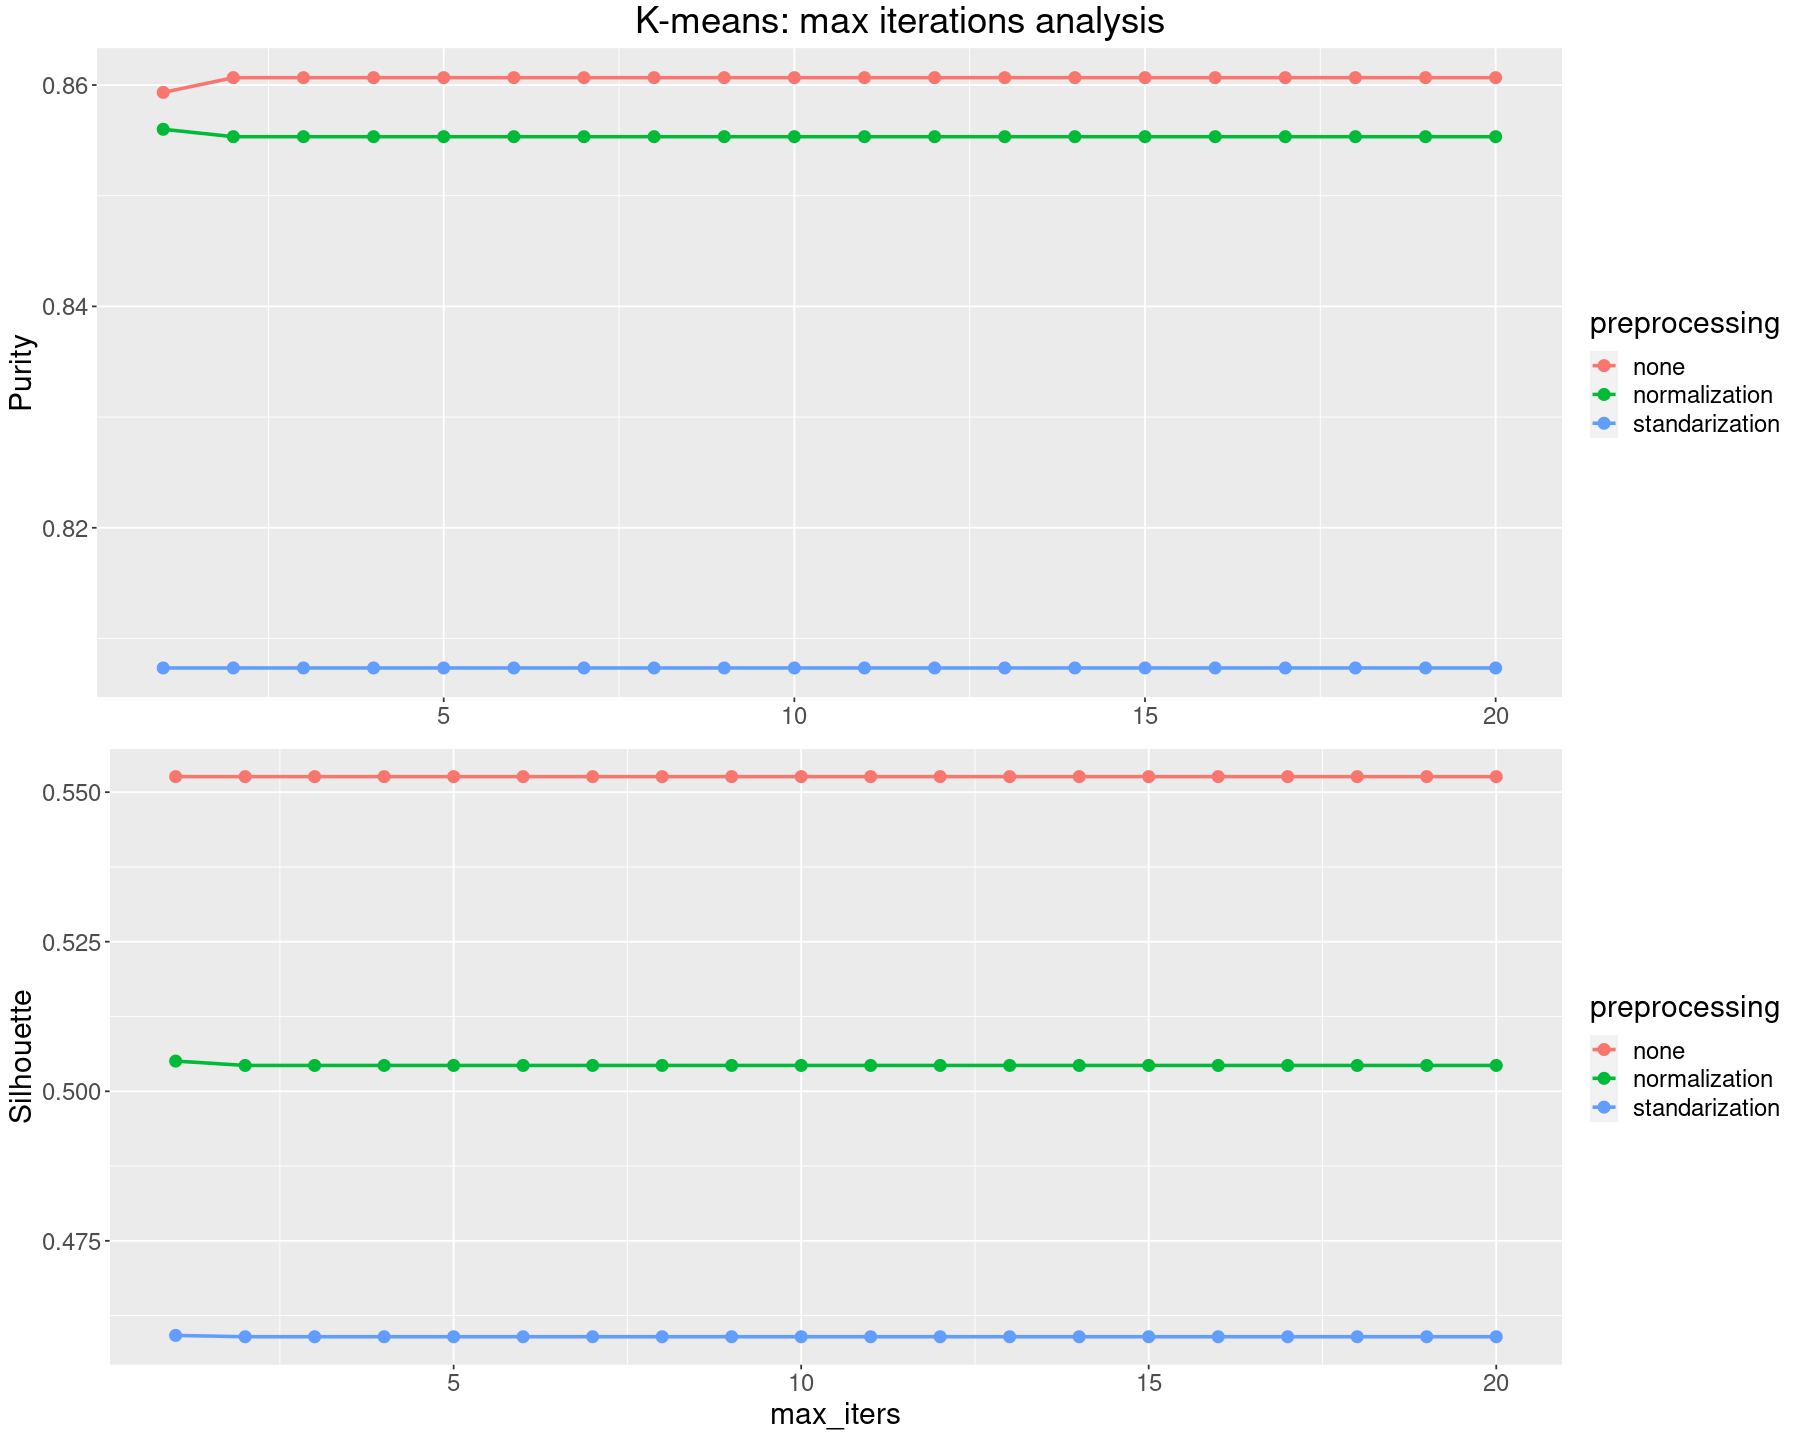

In [5]:
df <- kmeans.maxIters.search(irisData, 10, 20)
G <- kmeans.maxIters.vis(df)

#### 2.2.2 Badanie pozostałych parametrów (ilość klastrów oraz nstart)

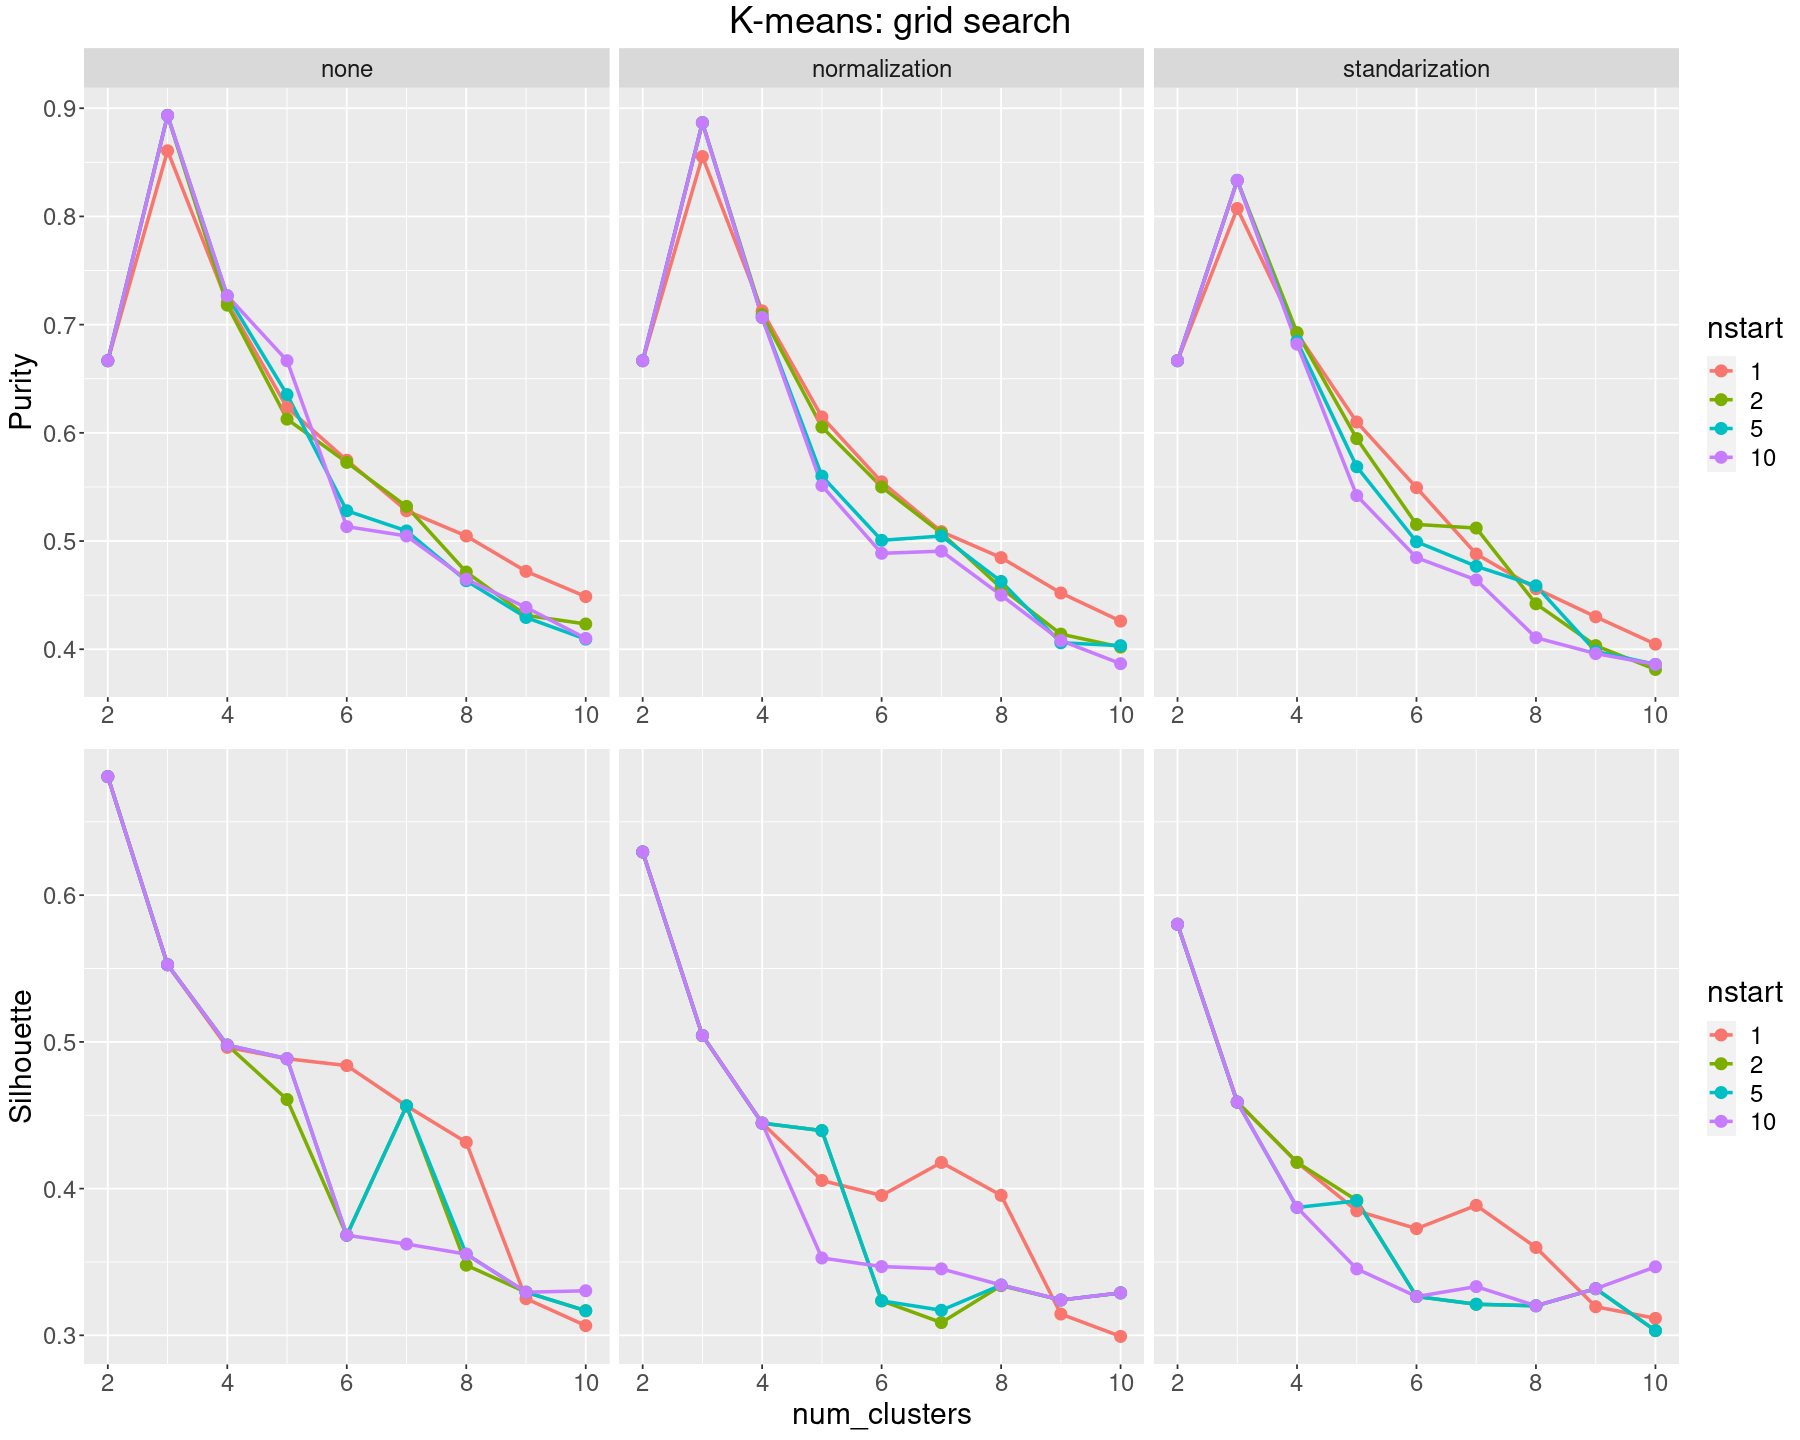

In [6]:
df <- kmeans.gridSearch(irisData, 10, 10, c(1, 2, 5, 10))
G <- kmeans.gridSearch.vis(df)

### 2.2 PAM

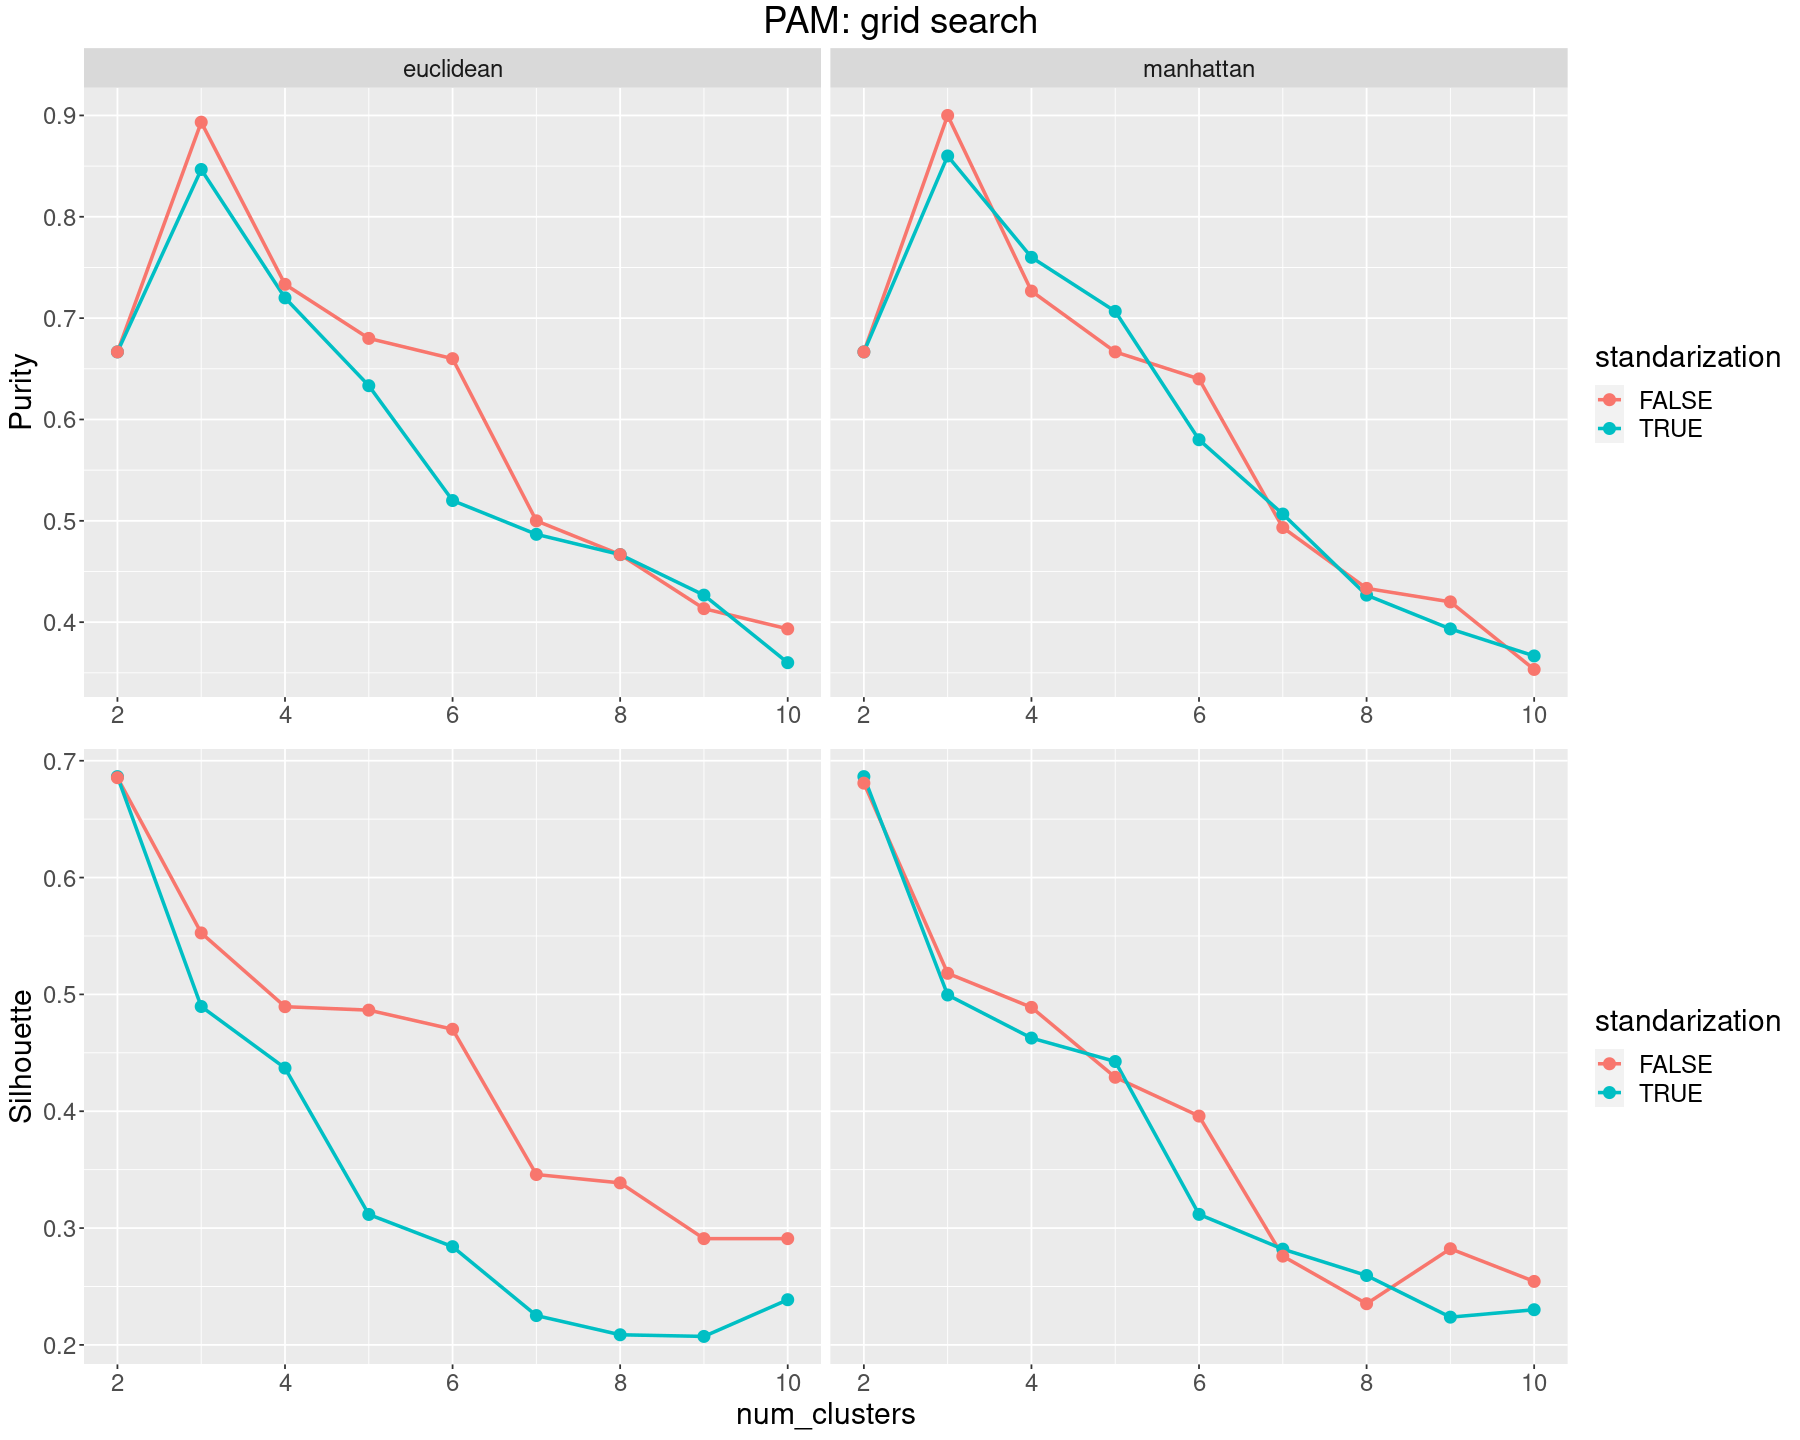

In [7]:
df <- pam.gridSearch(irisData, 10, 10)
G <- pam.gridSearch.vis(df)

# WINE

In [8]:
wineData <- read.csv("zbiory/wine.data", header = FALSE)
colnames(wineData) <- c(
    "class", "Alcohol", "Malic.acid", "Ash", "Alcanity.of.ash", "Magnesium", 
    "Total.phenols", "Flavanoids", "Nonflavanoid.phenosis", "Proanthocyanins",
    "Color.intensity", "Hue", "OD280/OD315.of.diluted wine", "Proline"
)

wineData$class=factor(wineData$class)
wineData <- wineData[, c(2:14,1)]
head(wineData)

Alcohol Malic.acid Ash  Alcanity.of.ash Magnesium Total.phenols Flavanoids
1 14.23   1.71       2.43 15.6            127       2.80          3.06      
2 13.20   1.78       2.14 11.2            100       2.65          2.76      
3 13.16   2.36       2.67 18.6            101       2.80          3.24      
4 14.37   1.95       2.50 16.8            113       3.85          3.49      
5 13.24   2.59       2.87 21.0            118       2.80          2.69      
6 14.20   1.76       2.45 15.2            112       3.27          3.39      
  Nonflavanoid.phenosis Proanthocyanins Color.intensity Hue 
1 0.28                  2.29            5.64            1.04
2 0.26                  1.28            4.38            1.05
3 0.30                  2.81            5.68            1.03
4 0.24                  2.18            7.80            0.86
5 0.39                  1.82            4.32            1.04
6 0.34                  1.97            6.75            1.05
  OD280/OD315.of.diluted wine Proline class
1 3.92                        1065    1    
2 3.40                        1050    1    
3 3.17                        1185    1    
4 3.45                        1480    1    
5 2.93                         735    1    
6 2.85                        1450    1

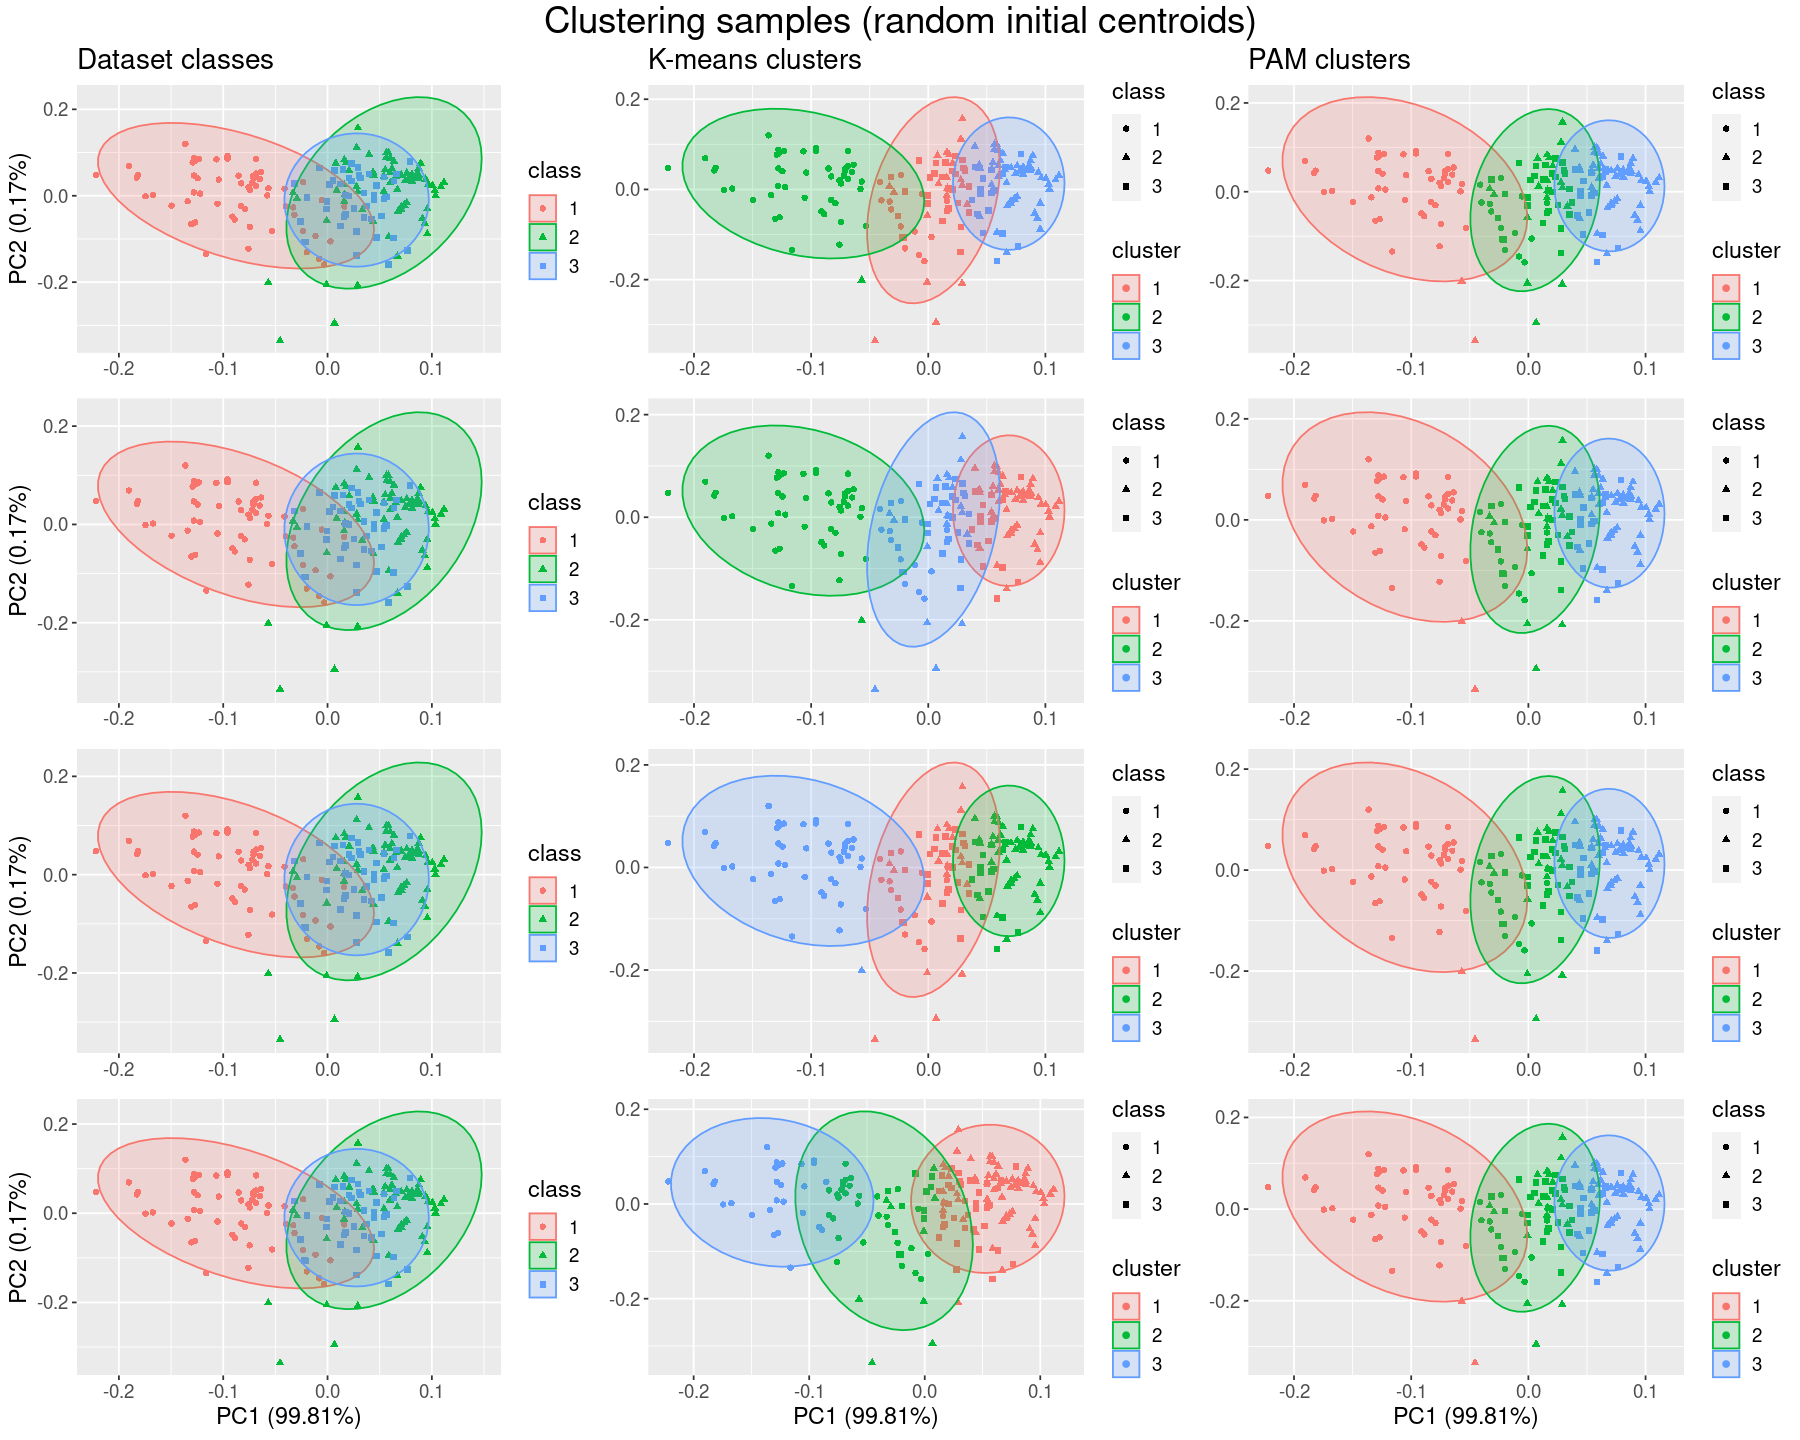

In [9]:
options(repr.plot.width=15, repr.plot.height=12)
G <- clustering.vis.samples(wineData, 4)

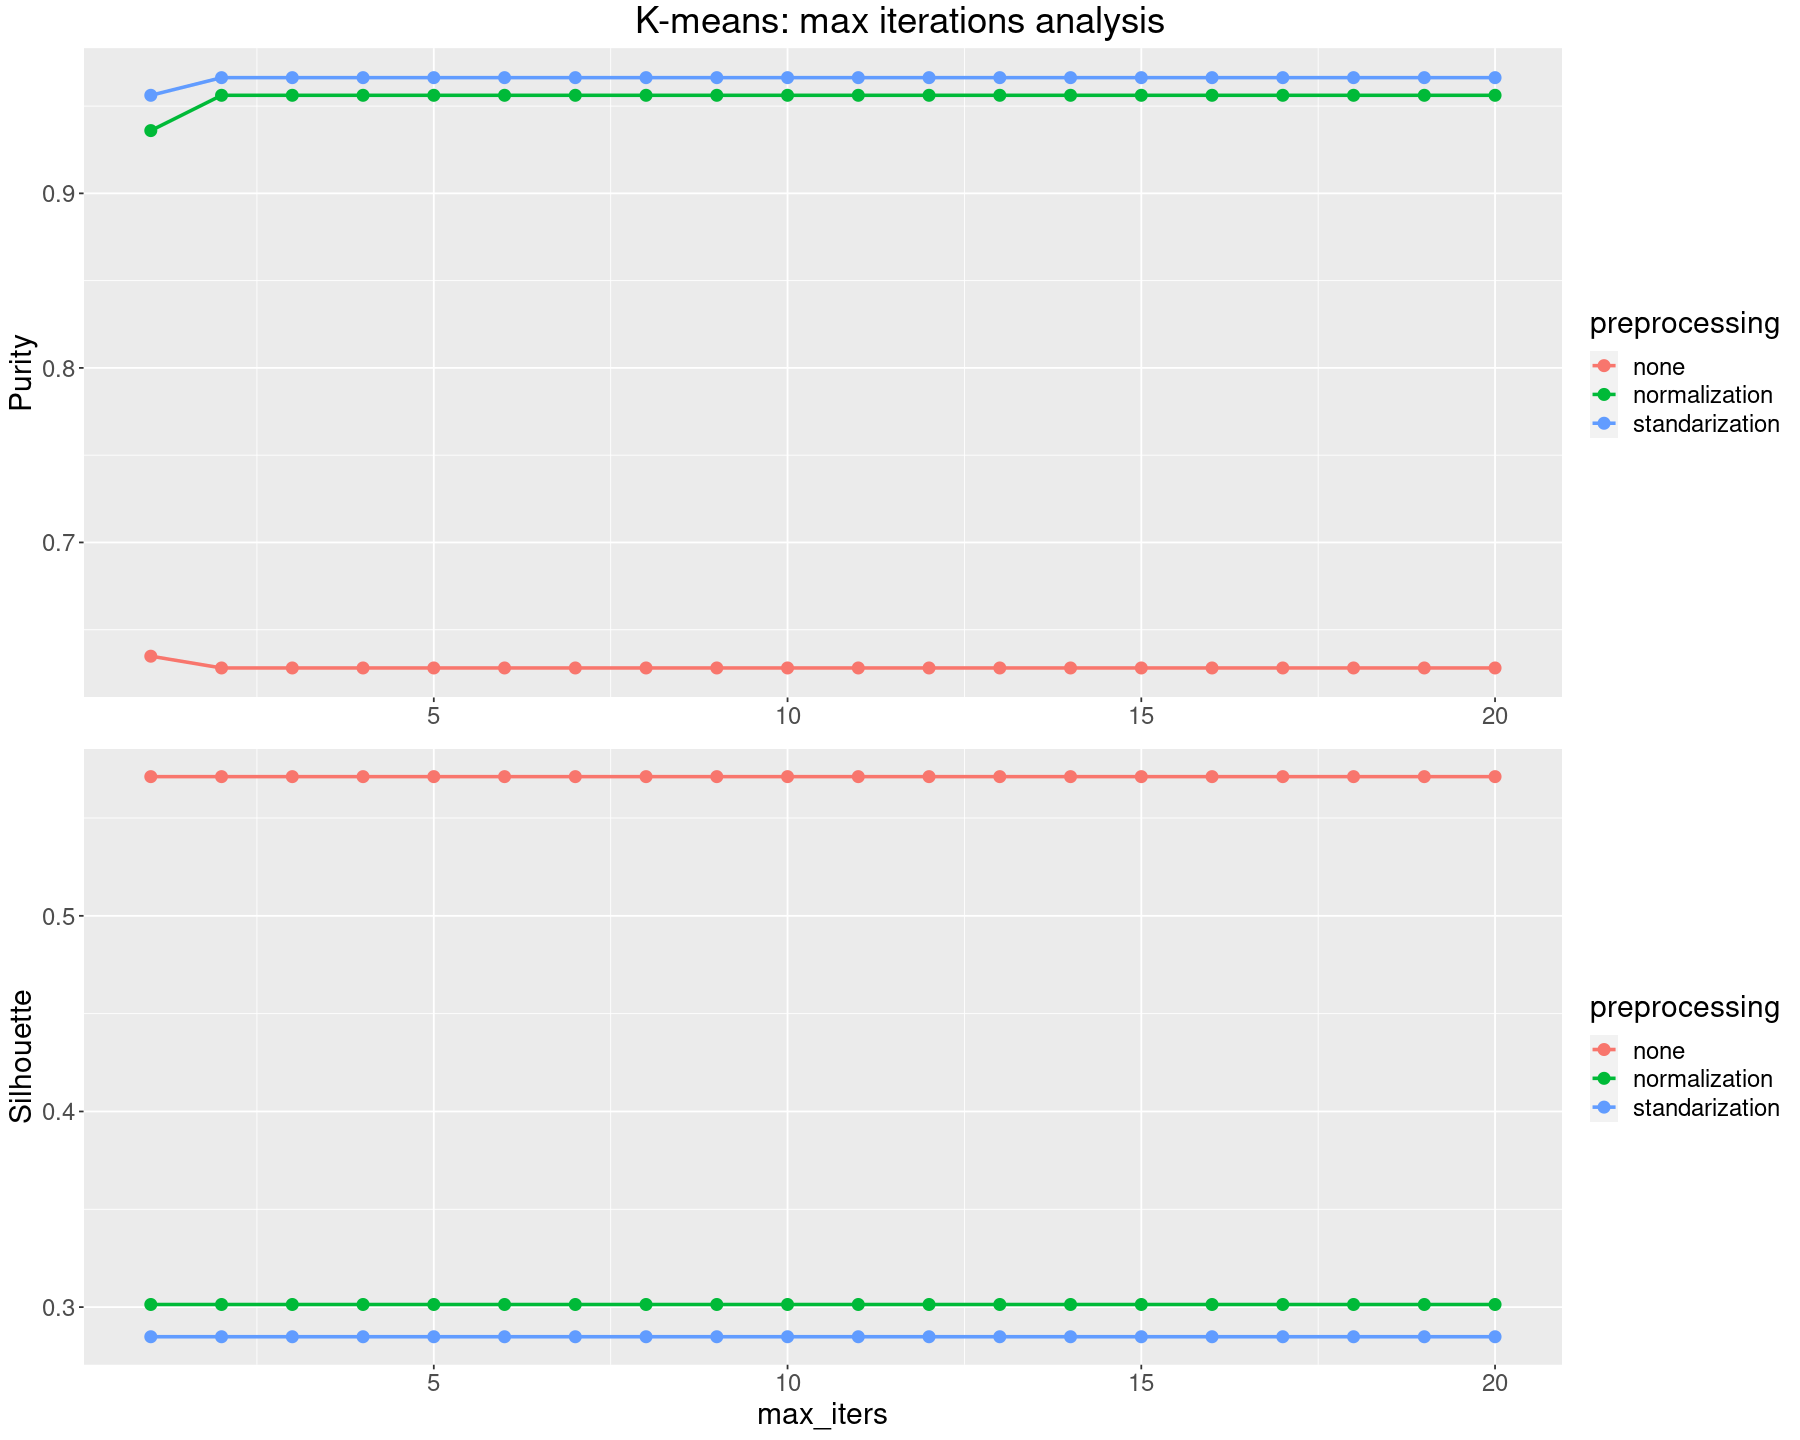

In [10]:
df <- kmeans.maxIters.search(wineData, 10, 20)
G <- kmeans.maxIters.vis(df)

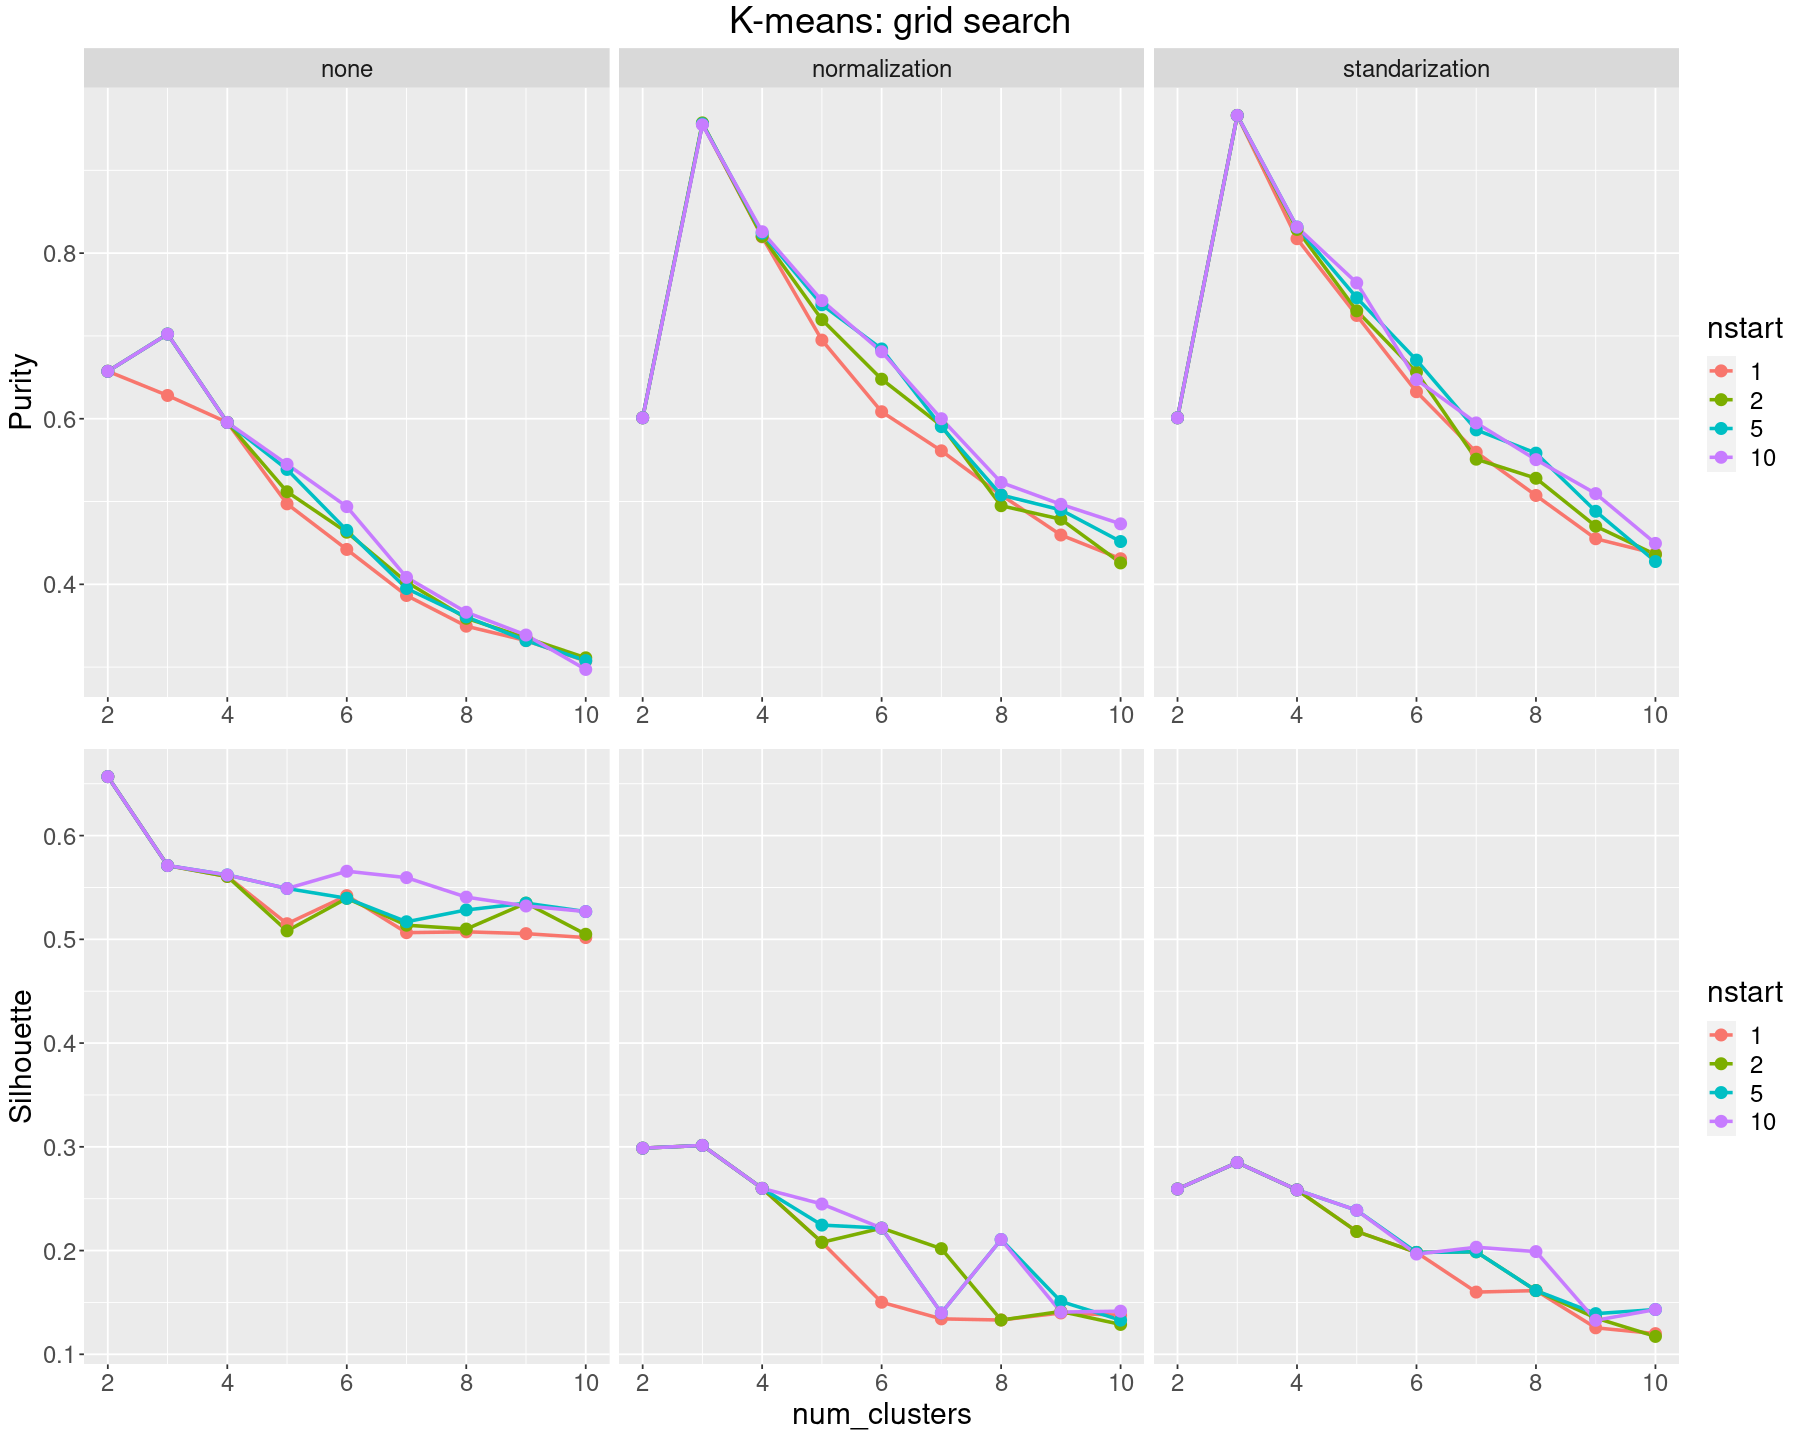

In [11]:
df <- kmeans.gridSearch(wineData, 10, 10, c(1, 2, 5, 10))
G <- kmeans.gridSearch.vis(df)

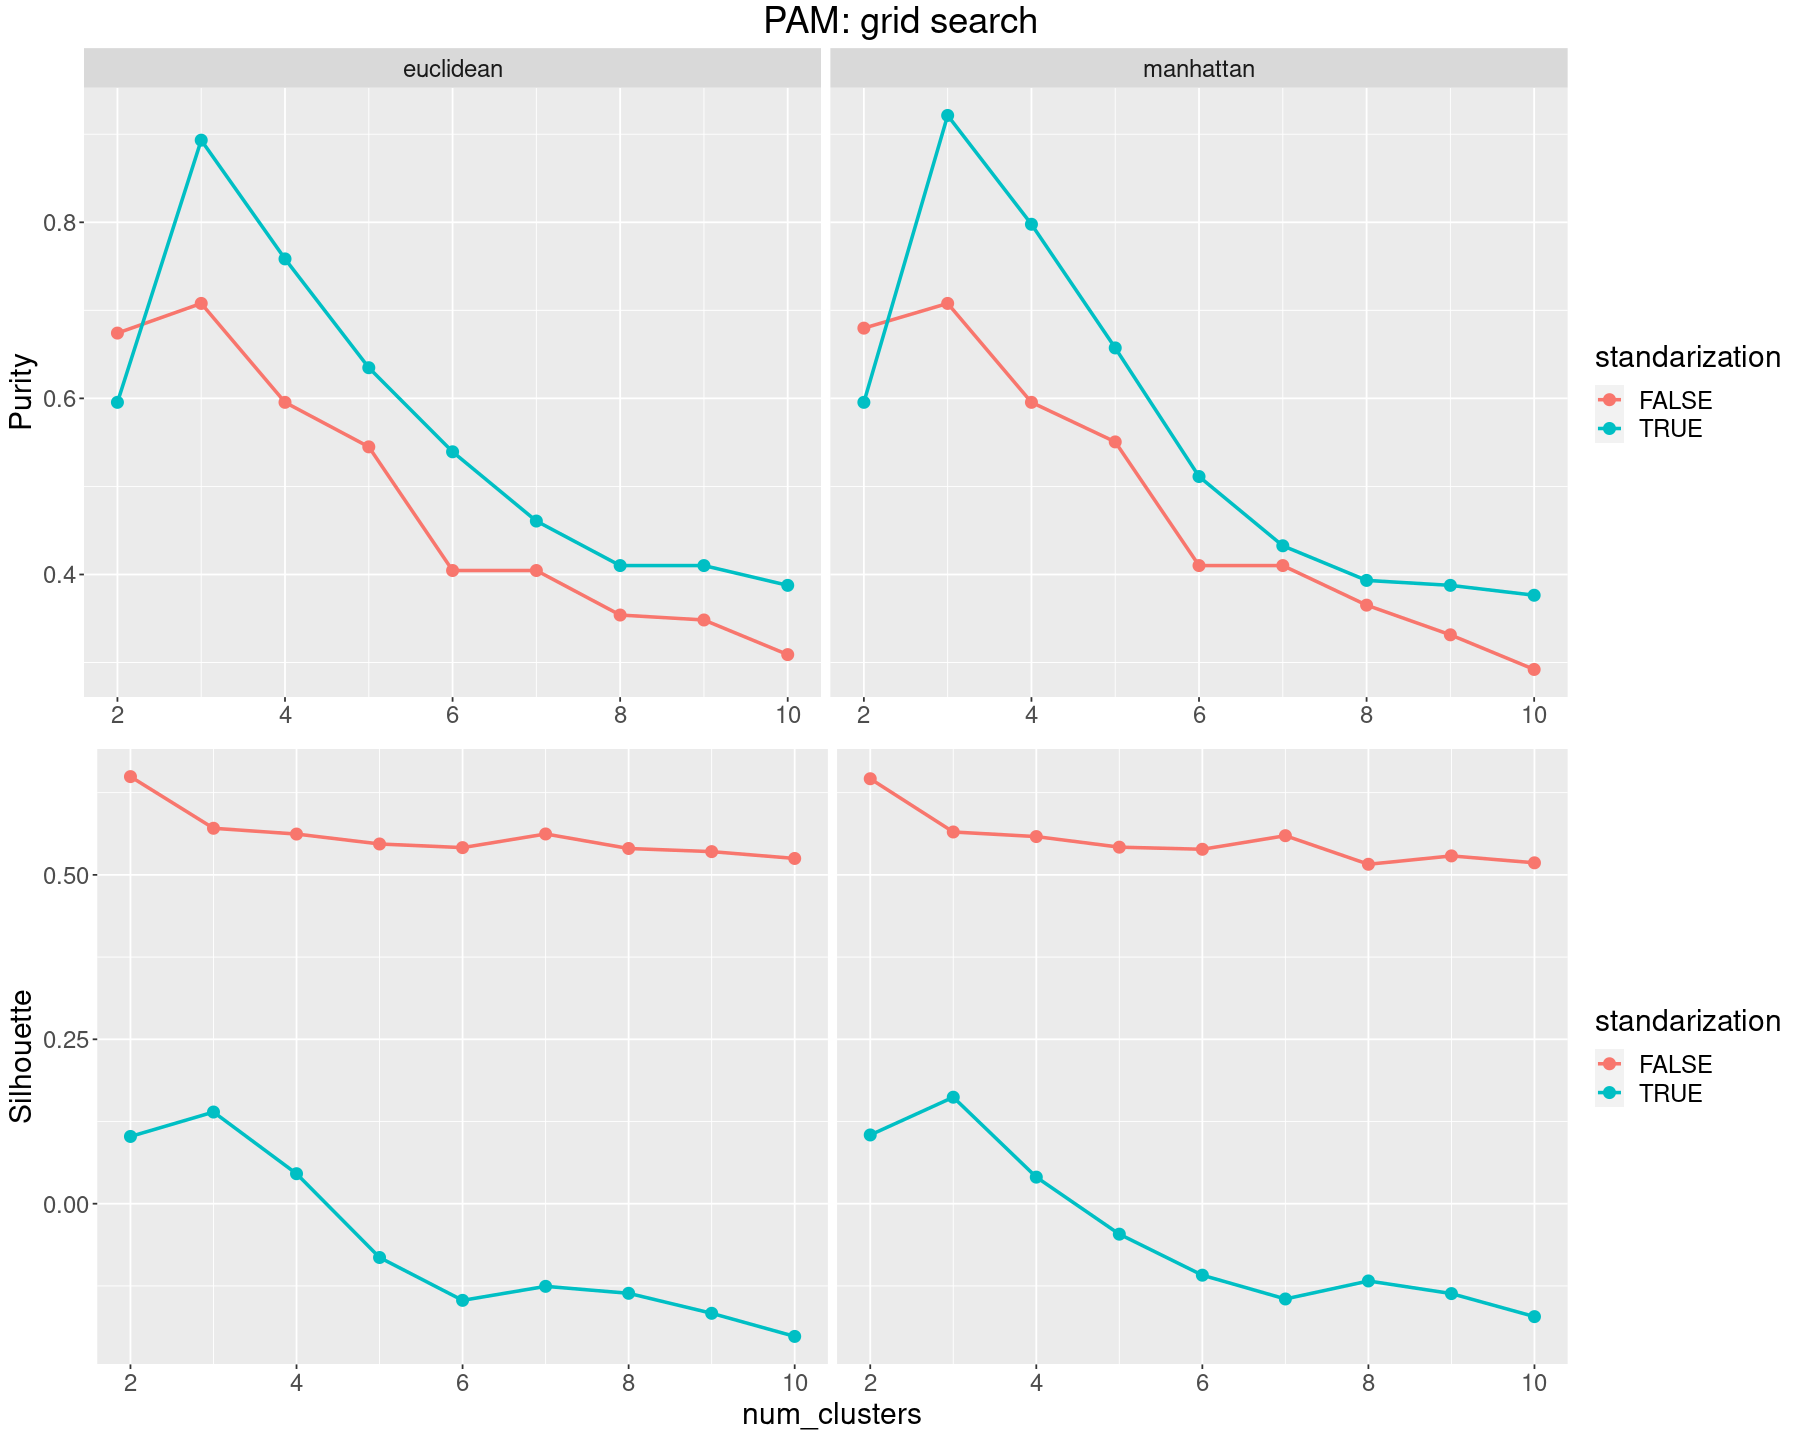

In [12]:
df <- pam.gridSearch(wineData, 10, 10)
G <- pam.gridSearch.vis(df)

# GLASS

In [13]:
glassData <- read.csv("zbiory/glass.data")
colnames(glassData) <- c("index", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class")
glassData <- subset(glassData, select = -c(index))

glassData$class=factor(glassData$class)
head(glassData)

RI      Na    Mg   Al   Si    K    Ca   Ba Fe   class
1 1.51761 13.89 3.60 1.36 72.73 0.48 7.83 0  0.00 1    
2 1.51618 13.53 3.55 1.54 72.99 0.39 7.78 0  0.00 1    
3 1.51766 13.21 3.69 1.29 72.61 0.57 8.22 0  0.00 1    
4 1.51742 13.27 3.62 1.24 73.08 0.55 8.07 0  0.00 1    
5 1.51596 12.79 3.61 1.62 72.97 0.64 8.07 0  0.26 1    
6 1.51743 13.30 3.60 1.14 73.09 0.58 8.17 0  0.00 1

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse



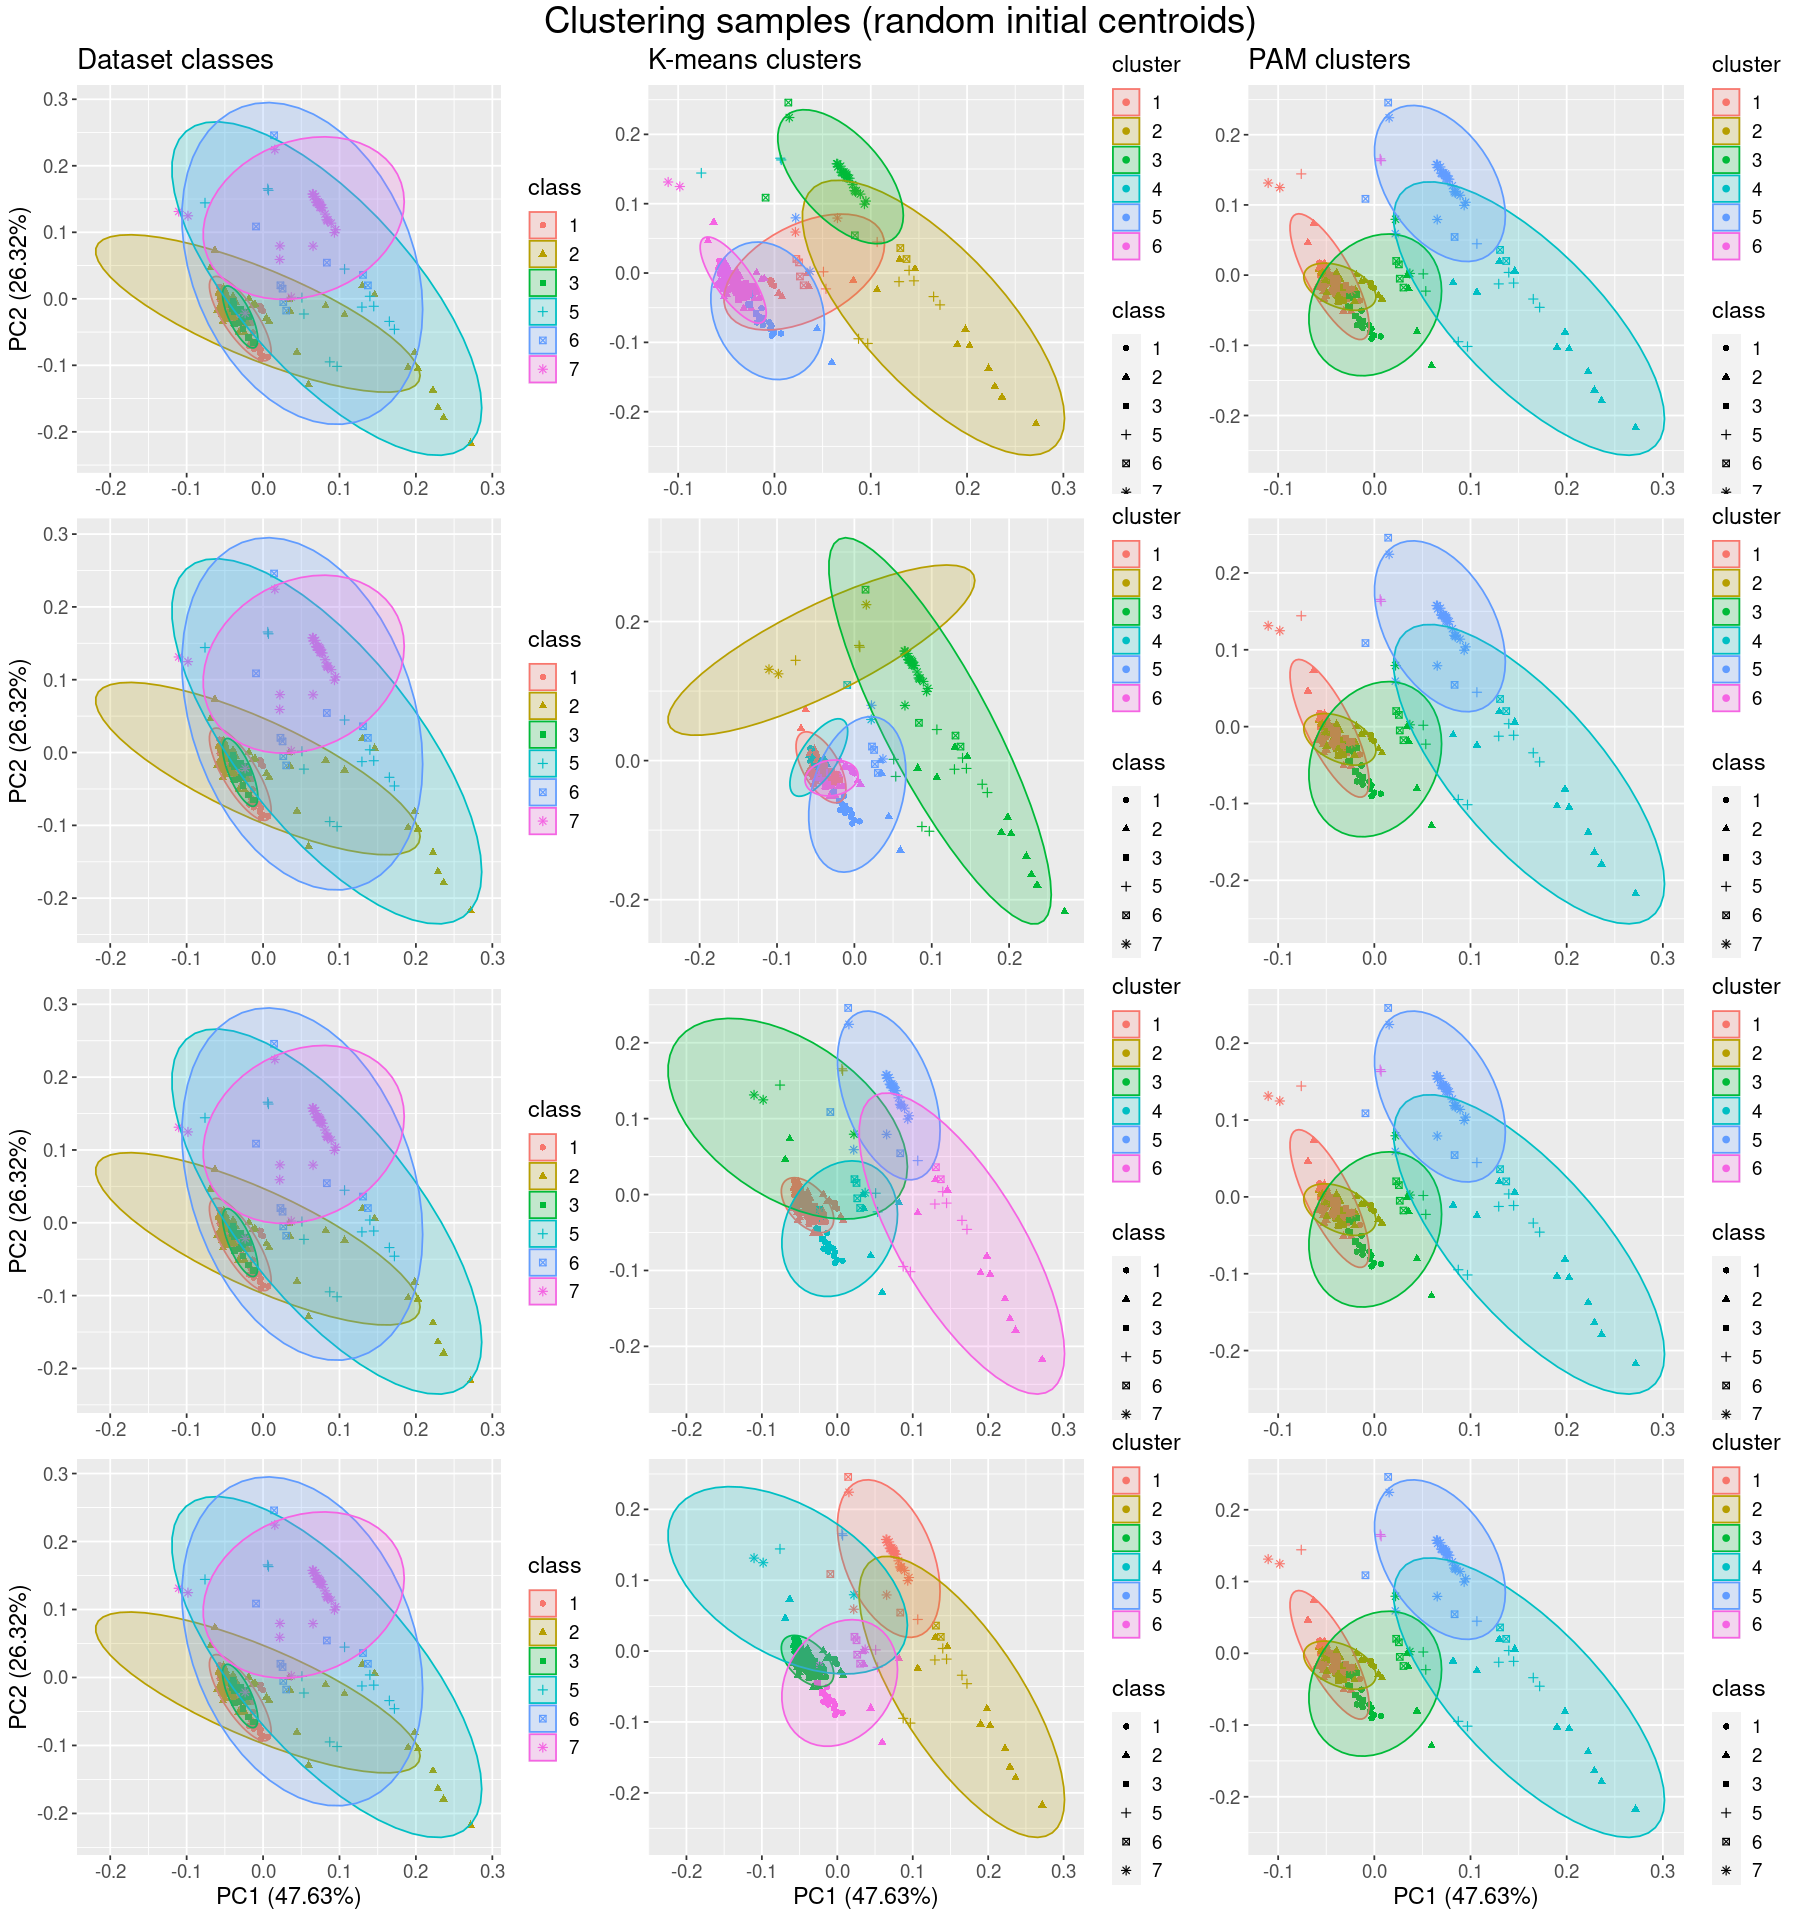

In [14]:
options(repr.plot.width=15, repr.plot.height=16)
G <- clustering.vis.samples(glassData, 4)

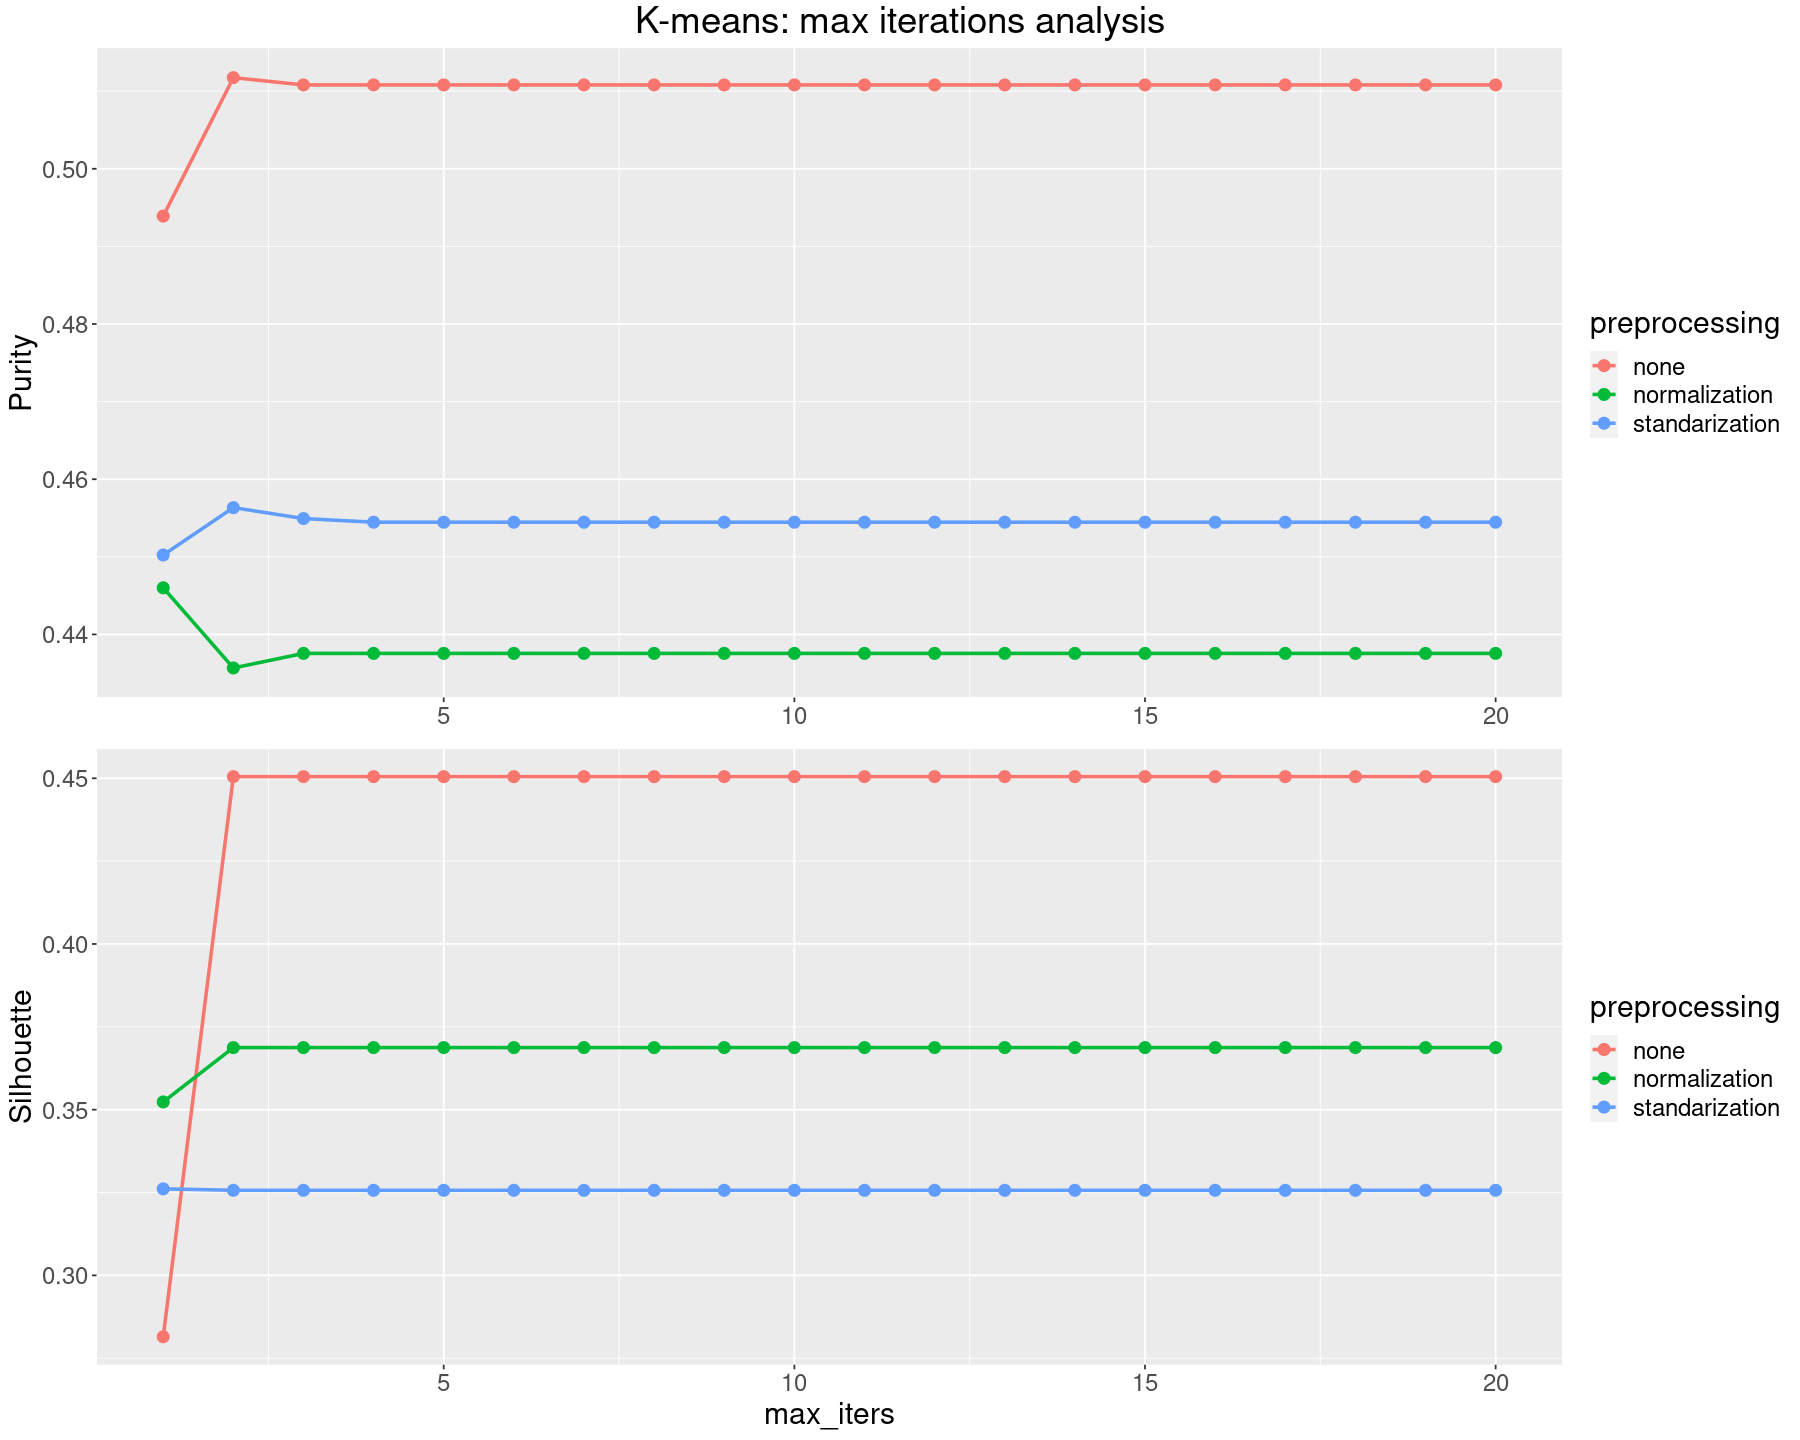

In [15]:
options(repr.plot.width=15, repr.plot.height=12)
df <- kmeans.maxIters.search(glassData, 10, 20)
G <- kmeans.maxIters.vis(df)

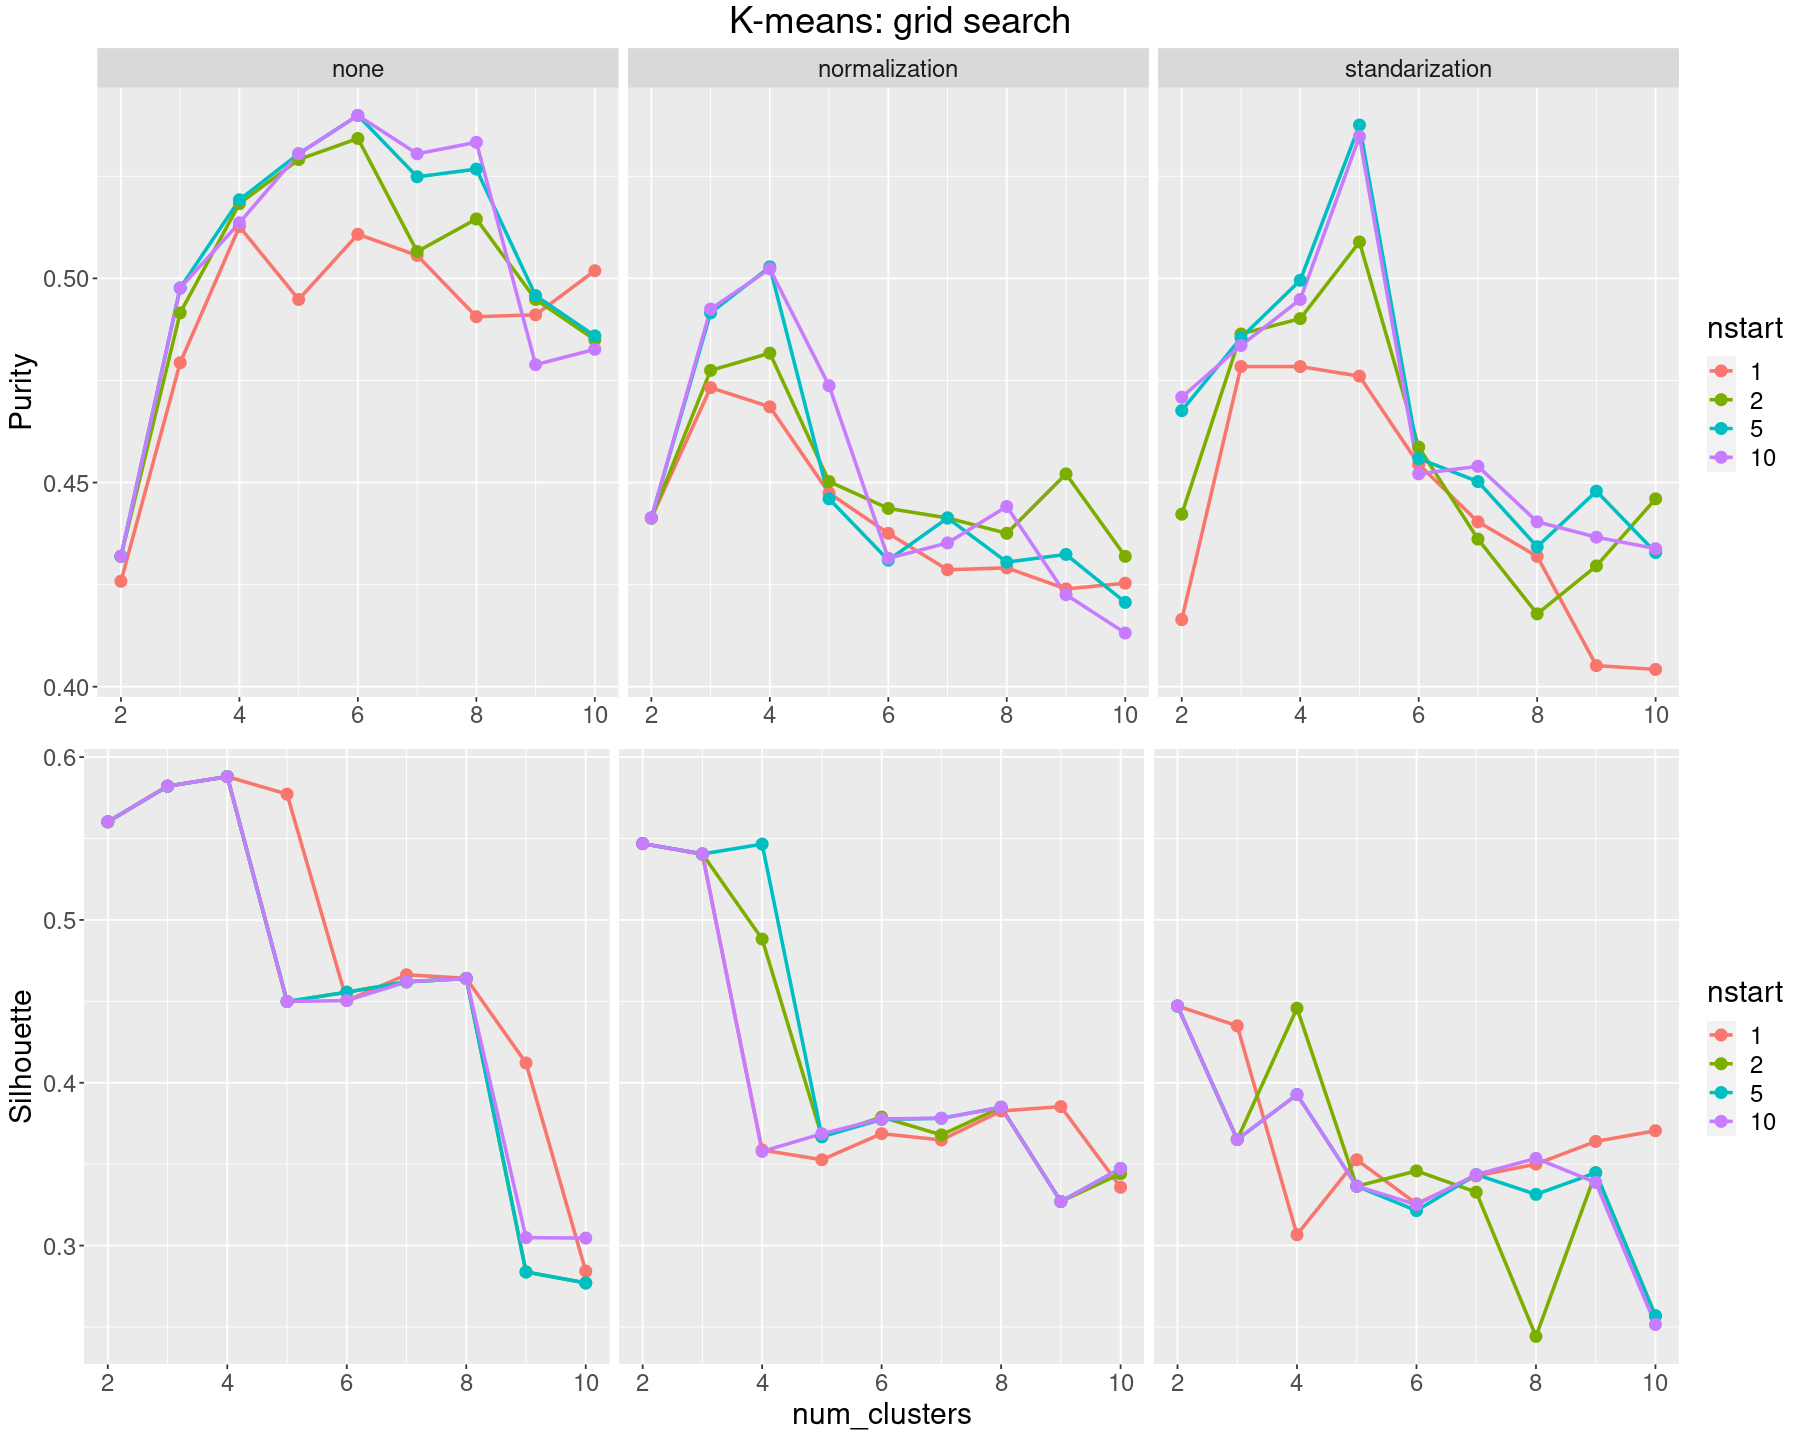

In [16]:
df <- kmeans.gridSearch(glassData, 10, 10, c(1, 2, 5, 10))
G <- kmeans.gridSearch.vis(df)

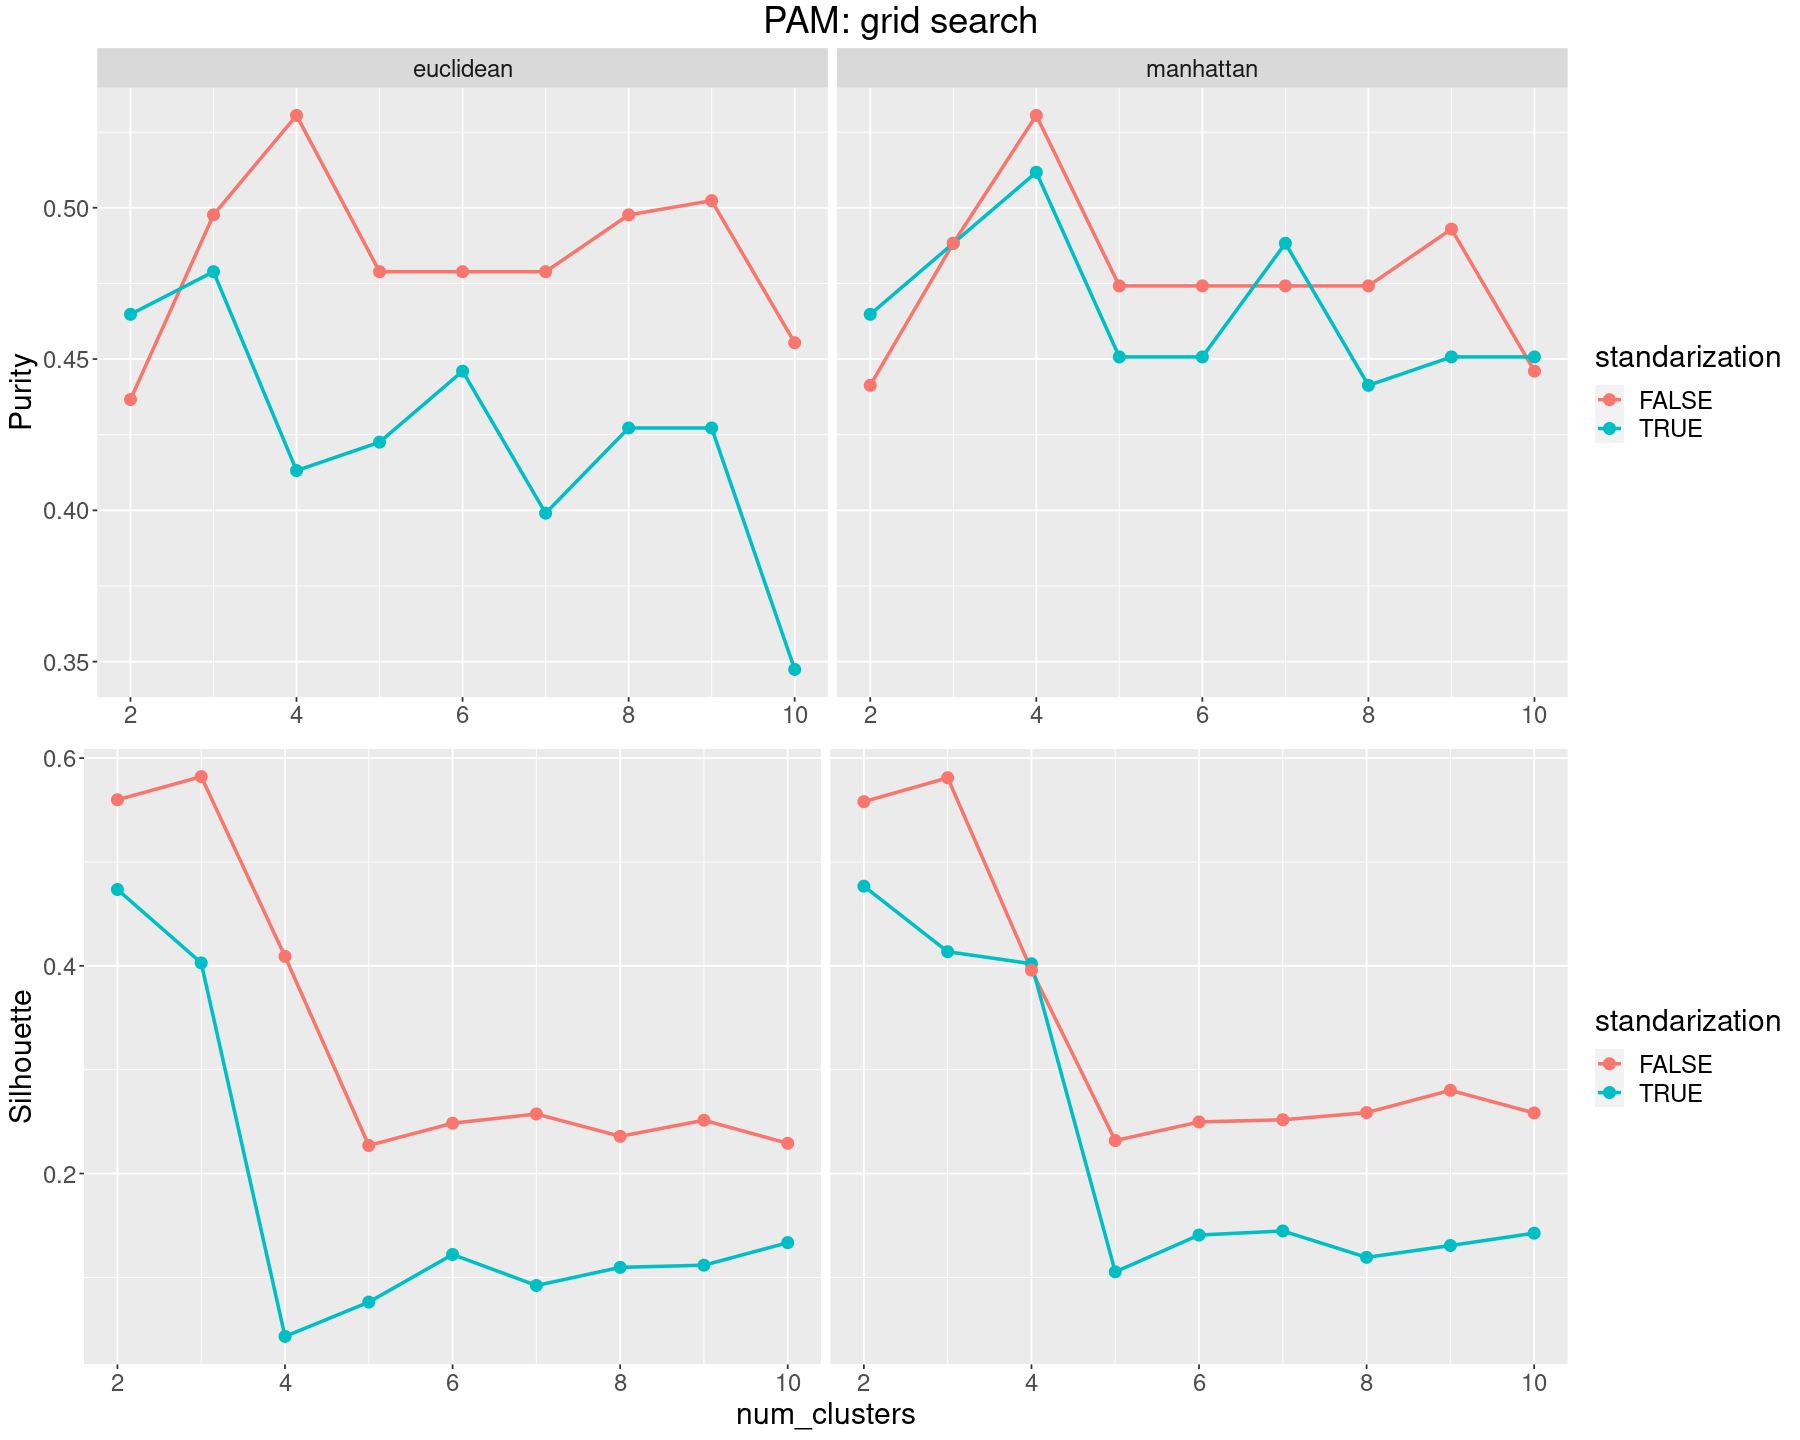

In [17]:
df <- pam.gridSearch(glassData, 10, 10)
G <- pam.gridSearch.vis(df)

# SEEDS

In [31]:
seedsData <- read.csv("zbiory/seeds_dataset.txt", header=FALSE, sep="")
colnames(seedsData) <- c("f1", "f2", "f3", "f4", "f5", "f6", "f7", "class")
seedsData$class=factor(seedsData$class)

head(seedsData)

f1    f2    f3     f4    f5    f6    f7    class
1 15.26 14.84 0.8710 5.763 3.312 2.221 5.220 1    
2 14.88 14.57 0.8811 5.554 3.333 1.018 4.956 1    
3 14.29 14.09 0.9050 5.291 3.337 2.699 4.825 1    
4 13.84 13.94 0.8955 5.324 3.379 2.259 4.805 1    
5 16.14 14.99 0.9034 5.658 3.562 1.355 5.175 1    
6 14.38 14.21 0.8951 5.386 3.312 2.462 4.956 1

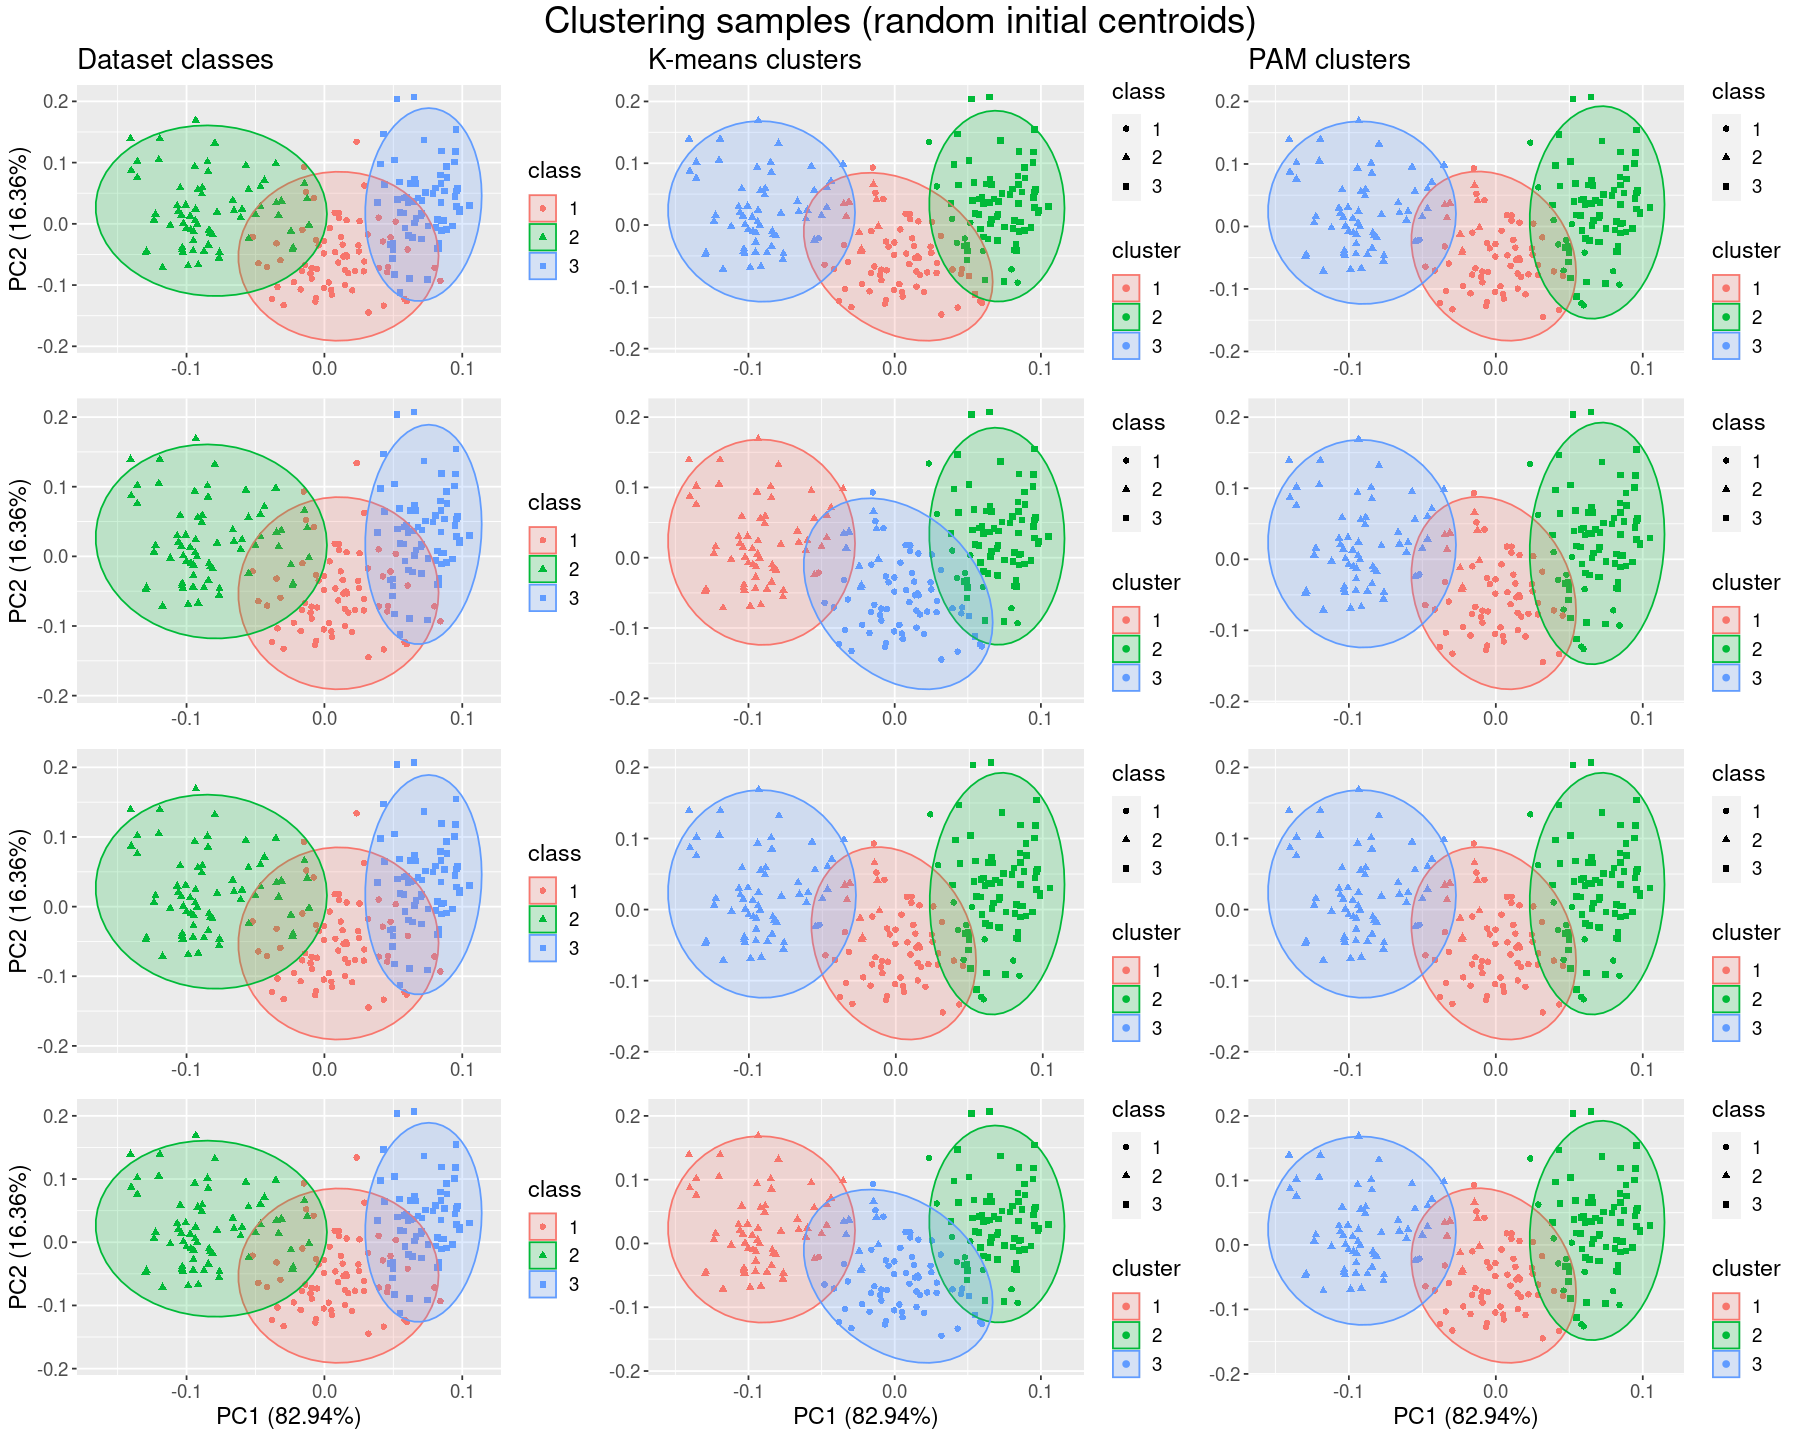

In [33]:
options(repr.plot.width=15, repr.plot.height=12)
G <- clustering.vis.samples(seedsData, 4)

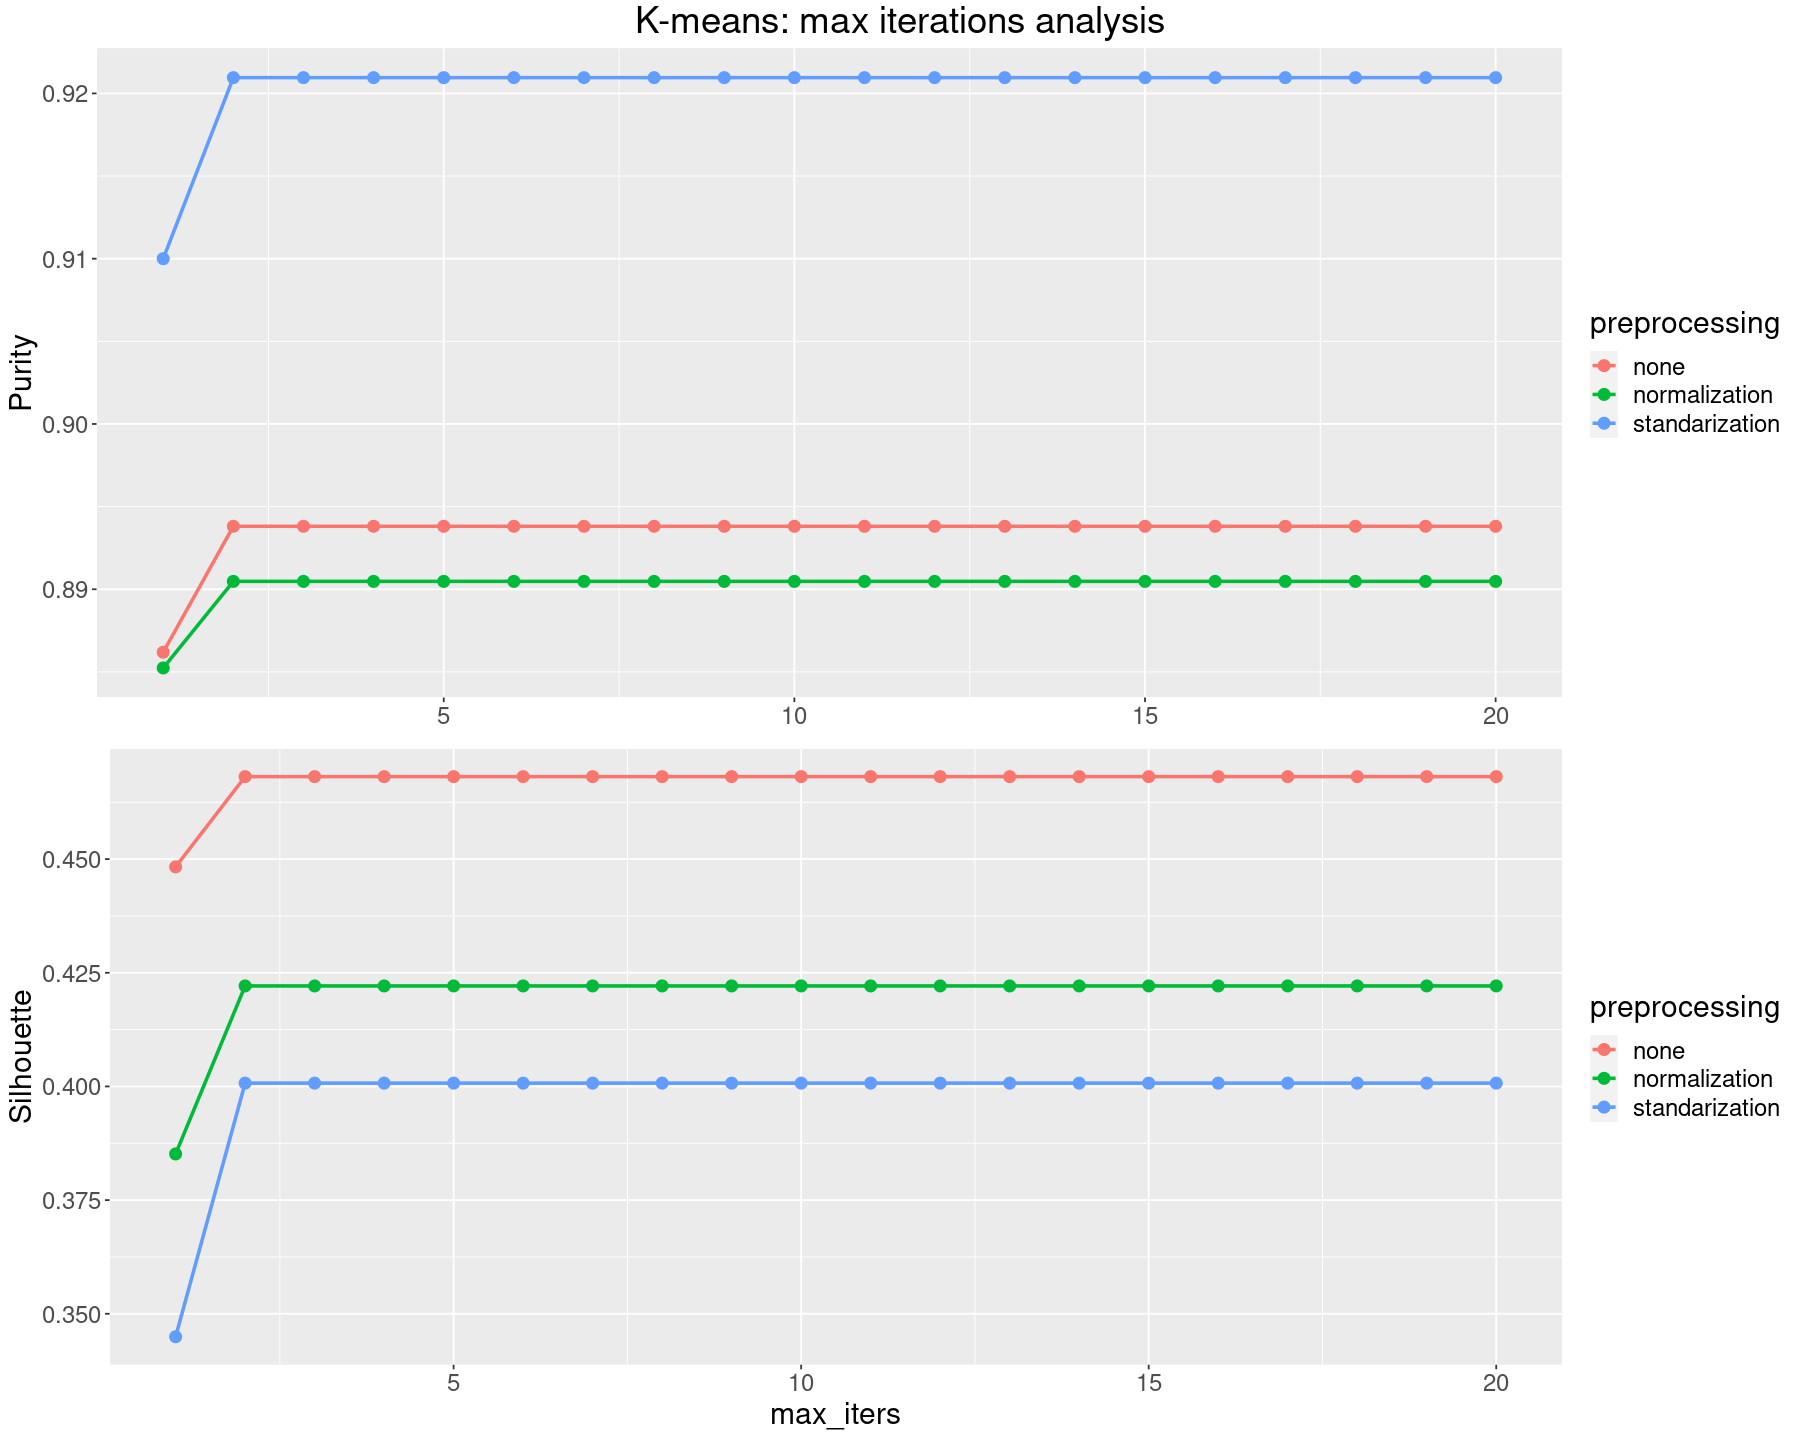

In [34]:
df <- kmeans.maxIters.search(seedsData, 10, 20)
G <- kmeans.maxIters.vis(df)

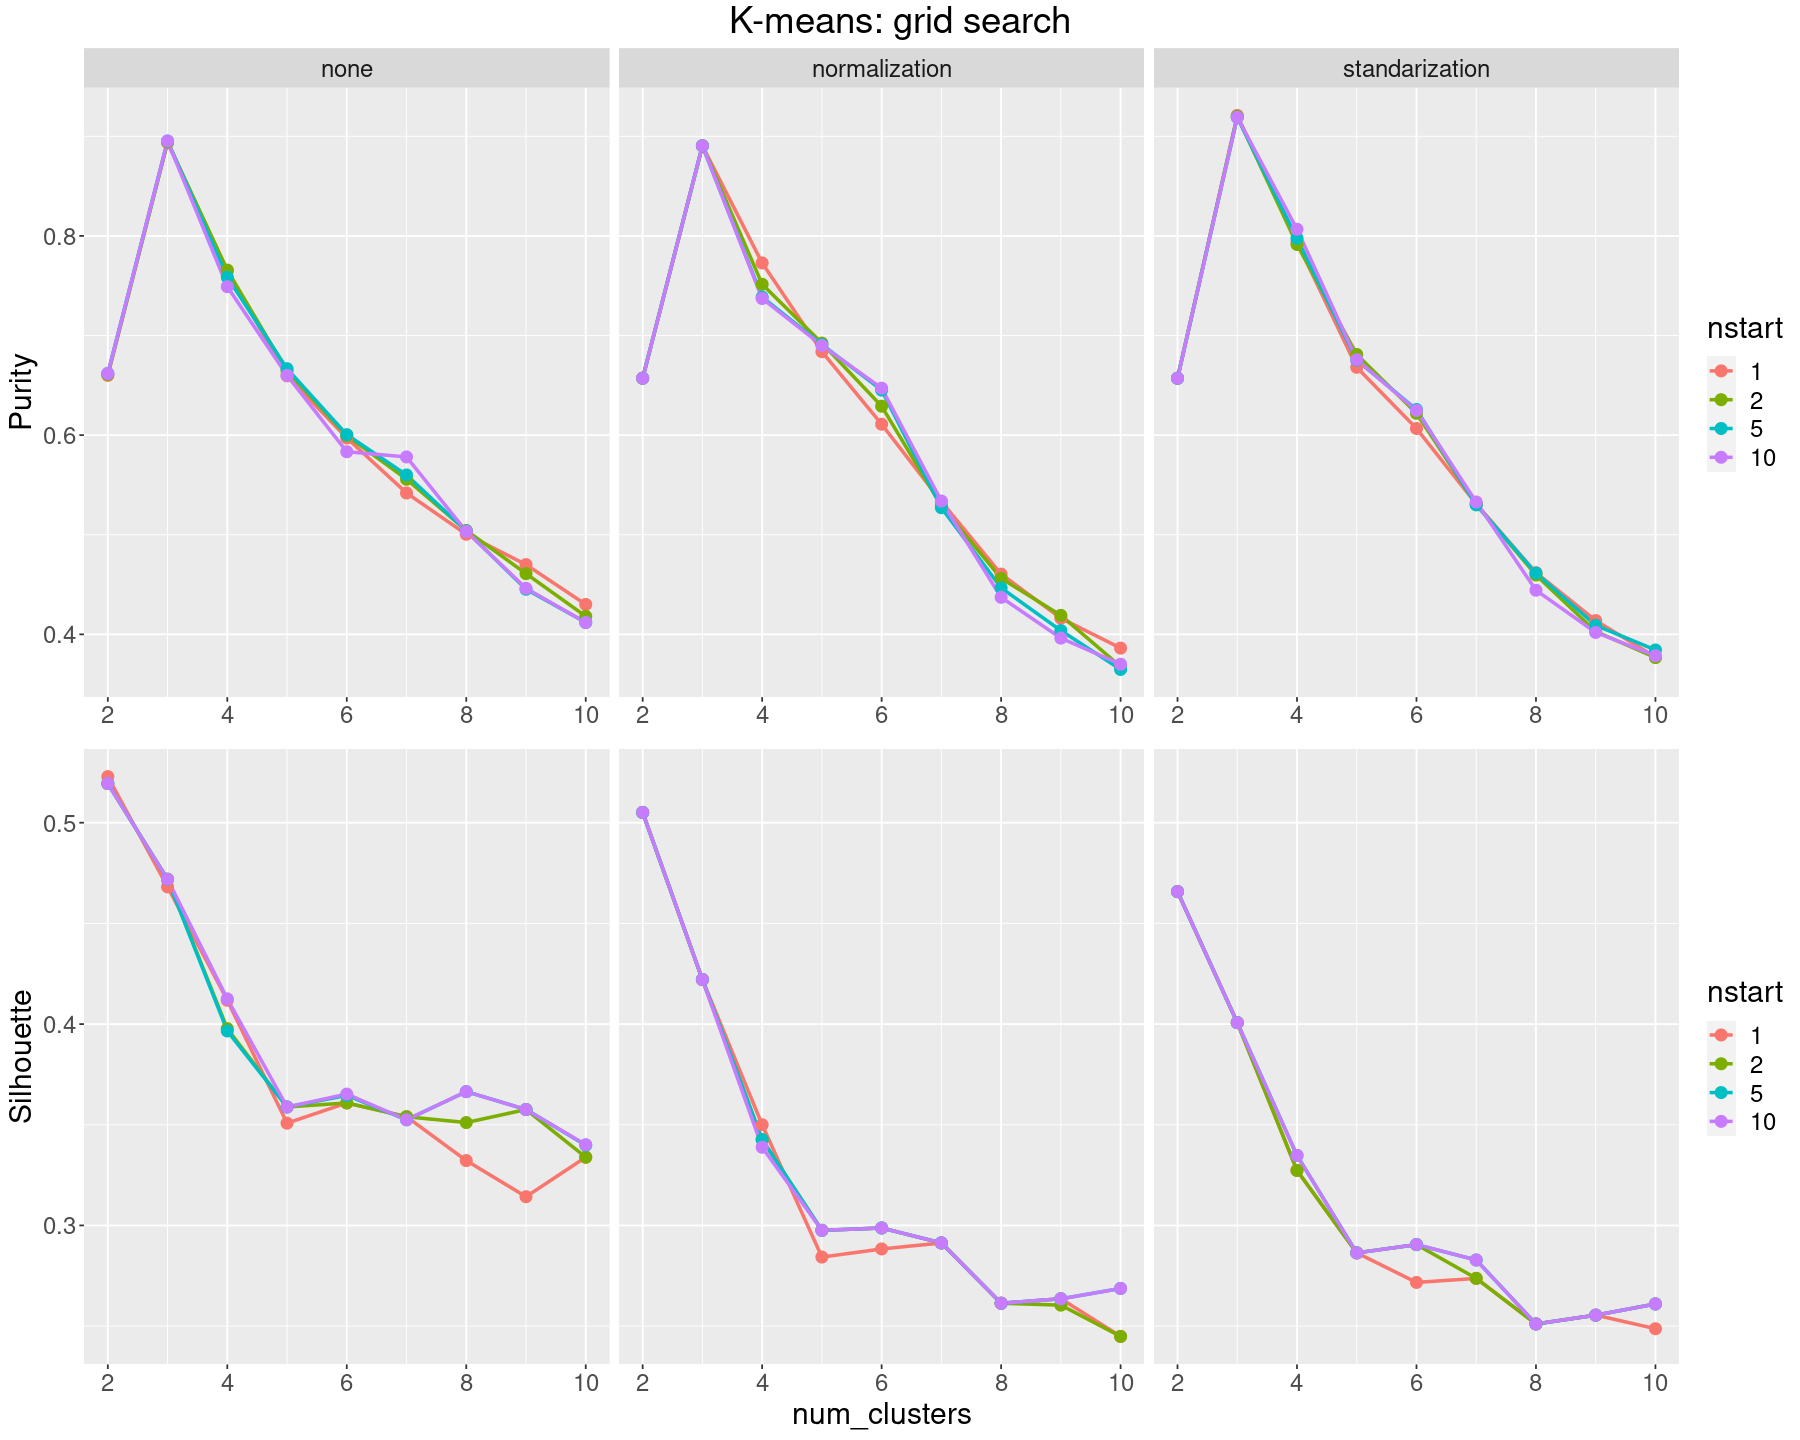

In [35]:
df <- kmeans.gridSearch(seedsData, 10, 10, c(1, 2, 5, 10))
G <- kmeans.gridSearch.vis(df)

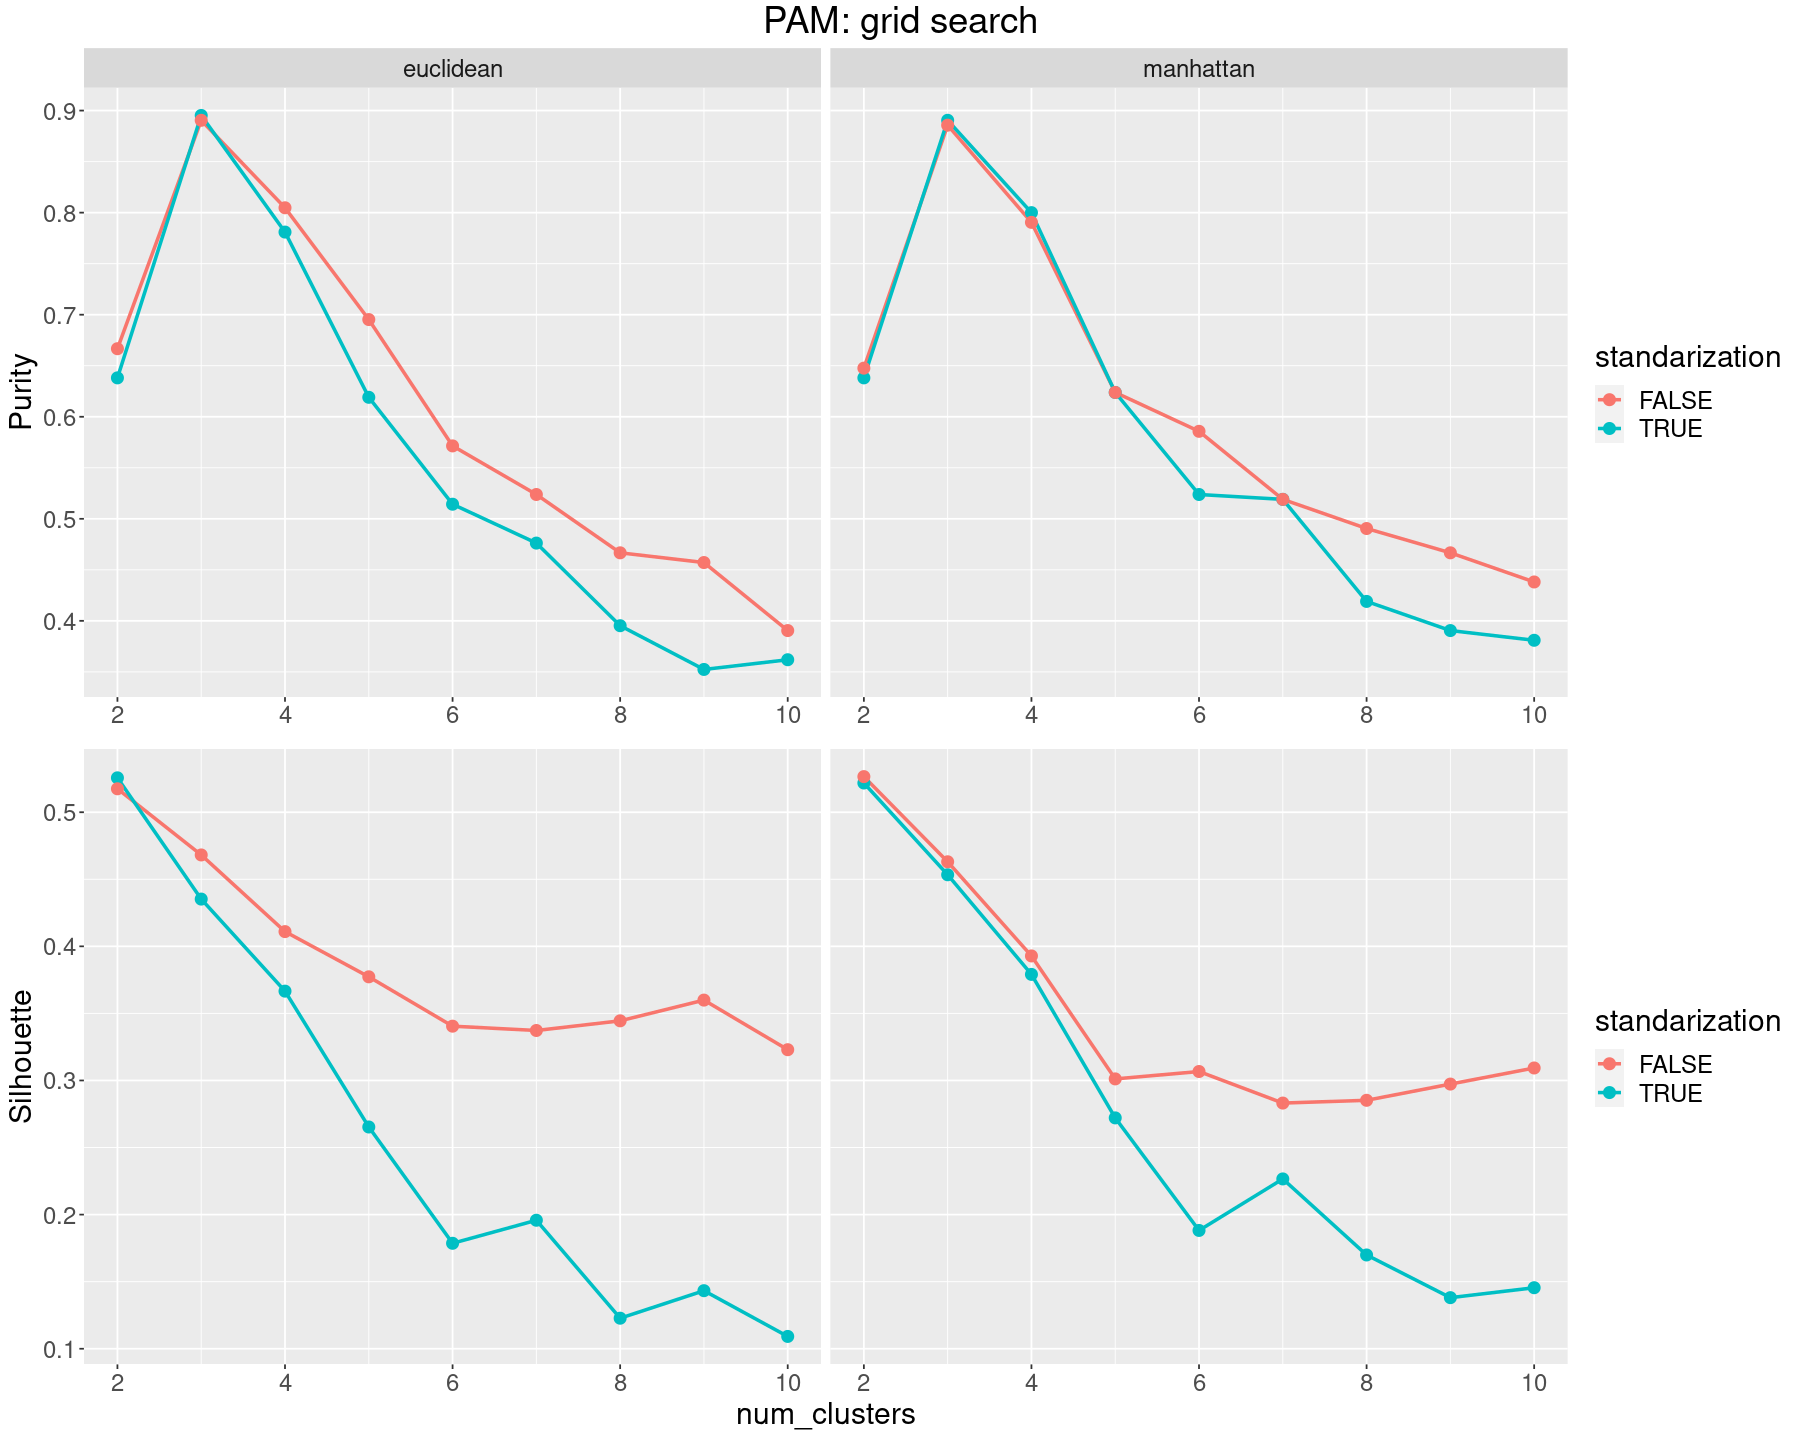

In [36]:
df <- pam.gridSearch(seedsData, 10, 10)
G <- pam.gridSearch.vis(df)